# Derivatives Analytics - Introduction to Object Oriented Programming

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

[Executive Summary](#executive-summary)

**TODO**

### **Resources**: 

**TODO**

# Executive Summary <a name="executive-summary"></a>

**Make intro**

The following sections are organized as follows:

- **TODO**

These are the basic imports that we need to work with NumPy, Pandas and to plot data using Matplotlib functionalities

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for statistical functions
from scipy import stats

# for Matplotlib plotting
import matplotlib.pyplot as plt

# to do inline plots in the Notebook
%matplotlib inline

# for Operating System operations
import os

# for some mathematical functions
import math

# Introduction to dates management: `datetime` module <a name="introduction-to-dates"></a>

In [2]:
# for date management
import datetime as dt

In [3]:
today = dt.datetime.today()
today

datetime.datetime(2020, 4, 28, 17, 16, 14, 400555)

In [4]:
type(today)

datetime.datetime

In [5]:
my_birthday = dt.datetime(year=1988,month=6,day=1)
my_birthday

datetime.datetime(1988, 6, 1, 0, 0)

In [6]:
type(my_birthday)

datetime.datetime

In [7]:
time_to_date = today - my_birthday
time_to_date

datetime.timedelta(days=11654, seconds=62174, microseconds=400555)

In [8]:
type(time_to_date)

datetime.timedelta

In [9]:
time_to_date.days

11654

In [10]:
time_to_date.days/365

31.92876712328767

In [11]:
date_string = "18-04-2020"
date_string

'18-04-2020'

In [12]:
type(date_string)

str

In [13]:
isinstance(date_string, str)

True

In [14]:
date = dt.datetime.strptime(date_string, "%d-%m-%Y")
date

datetime.datetime(2020, 4, 18, 0, 0)

In [15]:
type(date)

datetime.datetime

In [16]:
isinstance(date, dt.datetime)

True

In [17]:
date_string_from_dt = date.strftime("%d-%m-%Y")
date_string_from_dt

'18-04-2020'

In [18]:
type(date_string_from_dt)

str

In [19]:
isinstance(date_string_from_dt, str)

True

In [20]:
date + dt.timedelta(days=25)

datetime.datetime(2020, 5, 13, 0, 0)

## Non-financial Introduction to OOP <a name="non-financial-introduction-to-oop"></a>

### Without OOP: a person <a name="nonoopperson"></a> 

In [21]:
def say_your_name(name, surname):
    print("My name is {} {}".format(name, surname))

In [22]:
my_name = "Gabriele"
my_surname = "Pompa"

In [23]:
say_your_name(name=my_name, surname=my_surname)

My name is Gabriele Pompa


In [24]:
def say_country_of_birth(country):
    print("My country of birth is {}".format(country))

In [25]:
my_country = "Italy"

In [26]:
say_country_of_birth(my_country)

My country of birth is Italy


In [27]:
def compute_age(birthdate):
    
    today = dt.datetime.today()  
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    if today >= next_birthday:
        age = today.year - birthdate.year
    else:
        age = today.year - birthdate.year - 1
        
    return age

In [28]:
my_birthdate = "01-06-1988"
my_birthdate

'01-06-1988'

In [29]:
my_age = compute_age(birthdate=my_birthdate)
my_age

31

In [30]:
def time_to_birthday(birthdate):
    
    today = dt.datetime.today()
    birthdate = dt.datetime.strptime(birthdate, "%d-%m-%Y") if isinstance(birthdate, str) else birthdate
    
    next_birthday = dt.datetime(year=today.year, month=birthdate.month, day=birthdate.day)
    
    return (next_birthday - today).days

In [31]:
days_to_birthday = time_to_birthday(my_birthdate)
days_to_birthday

33

### With OOP: the `Person` class <a name="oopperson"></a> 

In [32]:
class Person(object):
    """
    Person class implementing some typical features of a person.
    
    Attributes:
    -----------
        name (str):                   name string;
        surname (str):                surname string;
        country (str):                country of birth;
        birthdate (str; dt.datetime): date of birth. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        age (int):                    age, as computed by compute_age() method.
    
    Methods:
    --------
        say_your_name: (returns) None
            Prints name and surname.
            
        say_country_of_birth: None
            Prints country of birth.
            
        compute_age: int
            Computes the age, sets self.age attribute and returns it.
            
        time_to_birthday: int
            Computes the number of days left untill next birthdat and return the number.
    
    """
    
    def __init__(self, p_name, p_surname, p_country, p_birthdate):
        self.name      = p_name
        self.surname   = p_surname
        self.country   = p_country
        self.birthdate = dt.datetime.strptime(p_birthdate, "%d-%m-%Y") if isinstance(p_birthdate, str) else p_birthdate
        self.age       = None
    
    def say_your_name(self):
        print("My name is {} {}".format(self.name, self.surname))
        
    def say_country_of_birth(self):
        print("My country of birth is {}".format(self.country))
        
    def compute_age(self):
    
        today = dt.datetime.today()  

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        if today >= next_birthday:
            self.age = today.year - self.birthdate.year
        else:
            self.age = today.year - self.birthdate.year - 1

        return self.age 
    
    def time_to_birthday(self):

        today = dt.datetime.today()

        next_birthday = dt.datetime(year=today.year, month=self.birthdate.month, day=self.birthdate.day)

        return (next_birthday - today).days

In [33]:
gab = Person(p_name = "Gabriele", 
             p_surname = "Pompa", 
             p_country = "Italy", 
             p_birthdate = "01-06-1988")

In [34]:
type(gab)

__main__.Person

In [35]:
gab.name

'Gabriele'

In [36]:
gab.surname

'Pompa'

In [37]:
gab.say_your_name()

My name is Gabriele Pompa


In [38]:
gab.country

'Italy'

In [39]:
gab.say_country_of_birth()

My country of birth is Italy


In [40]:
gab.birthdate

datetime.datetime(1988, 6, 1, 0, 0)

In [41]:
gab.birthdate.strftime("%d-%m-%Y")

'01-06-1988'

In [42]:
gab.age is None

True

In [43]:
gab.compute_age()

31

In [44]:
gab.age

31

In [45]:
gab.time_to_birthday()

33

In [46]:
bill = Person(p_name = "Bill", 
              p_surname = "Gates", 
              p_country = "USA", 
              p_birthdate = "28-10-1955")

In [47]:
type(bill)

__main__.Person

In [48]:
bill.say_your_name()

My name is Bill Gates


## Introduction to OOP: Black-Scholes option pricer <a name="BS-option-pricer"></a>

### Without OOP: a call priced using Black-Scholes model <a name="nonoopperson"></a> 

In [49]:
def call_option_payoff(S,K):
    """
    call_option_payoff(S,K) computes returns the payoff of a call option given the spot price of the underlying asset 
    and strike price 'K'.
    
    Parameters:
        S (float): spot price of the underlying asset;
        K (float): strike price;
    
    Returns:
        payoff (float): call option payoff;
    """
    return max(0.0, S - K)


In [50]:
def call_option_price(S, K, tau, r, sigma):
    """
    call_option_price(S, K, tau, r, sigma) computes and returns the exact price of a call option 
    of time to maturity 'tau' and strike price 'K' given the spot price of the underlying asset 'S', 
    the continuosly compounded short-rate 'r' and volatility of the 
    underlying asset 'sigma'.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        sigma (float): volatility of underlying asset;
        
    Returns:
        price (float): call price;

    """
    
    if S == 0: # this is to avoid log(0) issues
        return 0.0
    elif tau == 0: # this is to avoid 0/0 issues
        return call_option_payoff(S, K)
    else:
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
        d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))

        price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

        return price

In [51]:
def call_upper_limit(S):
    """
    call_upper_limit(S) returns the upper limit for a vanilla call option price, 
    which coincides with the spot price of the underlying asset.

    Parameters:
        S (float):     spot price of the underlying asset;
        
    Returns:
        S (float):     spot price of the underlying asset;

    """
    
    return S

In [52]:
def call_lower_limit(S, K, tau, r):
    """
    call_lower_limit(S, K, tau, r) returns the lower limit for a vanilla call option price.

    Parameters:
        S (float):     spot price of the underlying asset;
        K (float):     strike price;
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        
    Returns:
        price_lower_limit (float): call lower limit price;

    """
    
    price_lower_limit = max(S - K*np.exp(-short_rate * tau), 0)
    
    return price_lower_limit

In [53]:
K              = 100.0
short_rate     = 0.05 # 5% per year
volatility     = 0.2  # 20% per year

In [54]:
S_strip = np.linspace(80, 120, 100)
S_strip = np.append(S_strip, K)
S_strip = np.sort(S_strip)
S_strip

array([ 80.        ,  80.4040404 ,  80.80808081,  81.21212121,
        81.61616162,  82.02020202,  82.42424242,  82.82828283,
        83.23232323,  83.63636364,  84.04040404,  84.44444444,
        84.84848485,  85.25252525,  85.65656566,  86.06060606,
        86.46464646,  86.86868687,  87.27272727,  87.67676768,
        88.08080808,  88.48484848,  88.88888889,  89.29292929,
        89.6969697 ,  90.1010101 ,  90.50505051,  90.90909091,
        91.31313131,  91.71717172,  92.12121212,  92.52525253,
        92.92929293,  93.33333333,  93.73737374,  94.14141414,
        94.54545455,  94.94949495,  95.35353535,  95.75757576,
        96.16161616,  96.56565657,  96.96969697,  97.37373737,
        97.77777778,  98.18181818,  98.58585859,  98.98989899,
        99.39393939,  99.7979798 , 100.        , 100.2020202 ,
       100.60606061, 101.01010101, 101.41414141, 101.81818182,
       102.22222222, 102.62626263, 103.03030303, 103.43434343,
       103.83838384, 104.24242424, 104.64646465, 105.05

In [55]:
tau_strip = np.array([0.05, 0.1, 0.25, 0.5, 0.75, 1.0])
tau_strip

array([0.05, 0.1 , 0.25, 0.5 , 0.75, 1.  ])

In [56]:
def plot_price_strip(S_list, K, tau_list, r, sigma):
    """
    plot_price_strip(S_list, tau_list) plot call option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        S_list (np.ndarray):   list of underlying values;
        K (float):             strike price
        tau_list (np.ndarray): list of times to maturity (in years);
        r (float):             continuously compounded short-rate;
        sigma (float):         volatility of underlying asset;
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity 
    for tau in np.flip(tau_list):
        ax.plot(S_list, [call_option_price(S, K, tau, r, sigma) for S in S_list], 
                '-', lw=1.5, label=r"$\tau={}$".format(tau))

    # plot the red payoff line for different underlying values
    ax.plot(S_list, [call_option_payoff(S, K) for S in S_list], 
            'r-', lw=1.5, label="$max(S_T - K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(K, r*100, sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

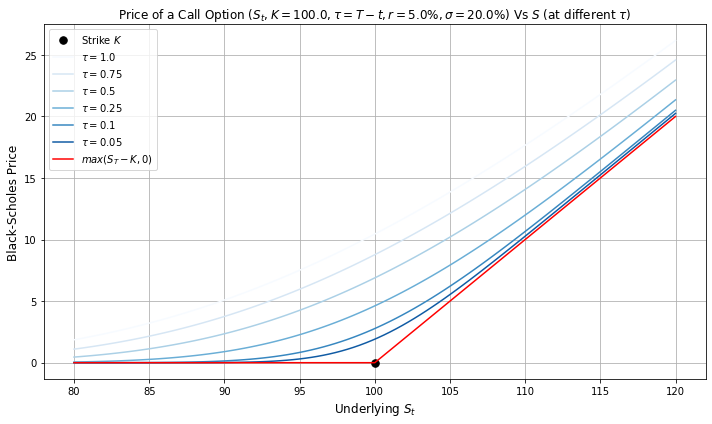

In [57]:
plot_price_strip(S_strip, K, tau_strip, short_rate, volatility)

In [58]:
tau = 2.0

K_focus = 5

S_strip_focus = np.linspace(0, 10, 100)
S_strip_focus = np.append(S_strip_focus, K_focus)
S_strip_focus = np.sort(S_strip_focus)
S_strip_focus

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.        ,  5.05050505,  5.15151515,  5.25252525,  5.35353535,
        5.45454545,  5.55555556,  5.65656566,  5.75757576,  5.85858586,
        5.95959596,  6.06060606,  6.16161616,  6.26262626,  6.36363636,
        6.46464646,  6.56565657,  6.66666667,  6.76767677,  6.86

In [59]:
def plot_price(S_list, K, tau, r, sigma):
    """
    plot_price(S_list, tau_strip) plot call option prices for underlying in 'S_list' at time to maturity 'tau'.

    Parameters:
        S_list (List): list of underlying values;
        K (float):     strike price
        tau (float):   time to maturity (in years);
        r (float):     continuously compounded short-rate;
        sigma (float): volatility of underlying asset;
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, price, lower limit for different underlying values
    ax.plot(S_list, [call_upper_limit(S) for S in S_list],                    
            'k-.', lw=1.5, label=r"Upper limit: $S_t$")
    ax.plot(S_list, [call_option_price(S, K, tau, r, sigma) for S in S_list], 
            'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, [call_lower_limit(S, K, tau, short_rate) for S in S_list], 
            'k--', lw=1.5, label=r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$")

    # plot the red payoff line for different underlying values
    ax.plot(S_list, [call_option_payoff(S, K) for S in S_list], 
            'r-', lw=1.5, label="$max(S_T - K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(K, tau, r*100, sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

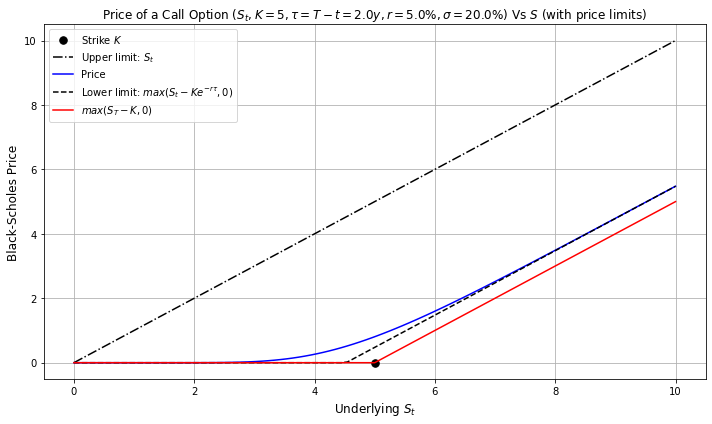

In [60]:
plot_price(S_strip_focus, K_focus, tau, short_rate, volatility)

### With OOP: the `BSCall` class <a name="bscall"></a> 

In [61]:
class CallOption(object):
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------                        
        payoff: float
            Computes the payoff of the option and returns it
            
        price_upper_limit: float 
            Returns the upper limit for a vanilla call option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla call option price.

        price: float
            Computes the exact price of the option and returns it

    """
    
    # constructor
    def __init__(self, S_t, K, t, T, r, sigma):
        self.S     = S_t
        self.K     = K
        self.t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.tau   = self.__time_to_maturity()
        self.r     = r
        self.sigma = sigma
        
    # string representation
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.S, self.K, self.t.strftime("%d-%m-%Y"), self.T.strftime("%d-%m-%Y"), self.tau, 
                       self.r*100, self.sigma*100)
      
    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.T - self.t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.S - self.K)
    
    # upper price limit
    def price_upper_limit(self):
        return self.S

    # lower price limit
    def price_lower_limit(self):
        return max(self.S - self.K*np.exp(-self.r * self.tau), 0)

    # price calculation
    def price(self):
        
        if self.S == 0: # this is to avoid log(0) issues
            return 0.0
        elif self.tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()        
        else:

            d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.tau) / (self.sigma * np.sqrt(self.tau))
            d2 = d1 - self.sigma * np.sqrt(self.tau)

            price = self.S * stats.norm.cdf(d1, 0.0, 1.0) - self.K * np.exp(-self.r * self.tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price    

In [62]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [63]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [64]:
type(call)

__main__.CallOption

In [65]:
call.S

90.0

In [66]:
call.K

100.0

In [67]:
call.T

datetime.datetime(2020, 12, 31, 0, 0)

In [68]:
call.tau

0.7013698630136986

In [69]:
call.payoff()

0.0

In [70]:
call.price()

3.487402470943657

In [71]:
call.price_upper_limit()

90.0

In [72]:
call.price_lower_limit()

0

In [73]:
max(call.S - call.K*np.exp(-call.r * call.tau), 0)

0

In [74]:
def plot_price_strip(option, S_list, tau_list):
    """
    plot_price_strip(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau_list (List):     list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(option.K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.tau = tau_list[i] # reset of time-to-maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.S = S_list[j] # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.tau))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.S = S_list[i] # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label="$max(S-K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.K, option.r, option.sigma), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

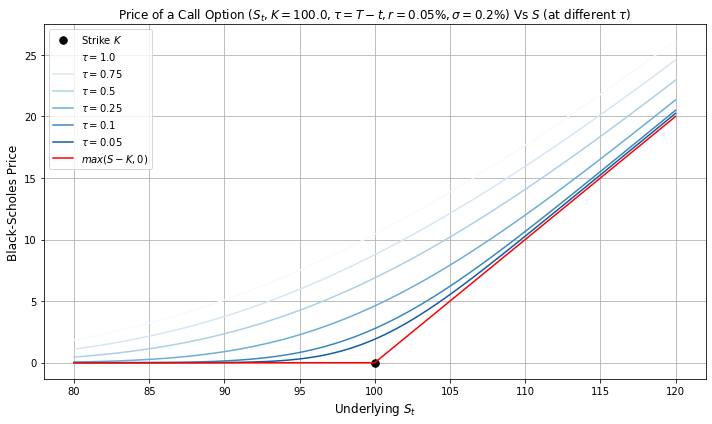

In [75]:
plot_price_strip(call, S_strip, tau_strip)

In [76]:
def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau (float):         time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # setting legend labels
    upper_limit_label = r"Upper limit: $S_t$"
    payoff_label      =r"$max(S-K, 0)$"
    lower_limit_label = r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
        
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.S = S_list[i] # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=upper_limit_label)
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=lower_limit_label)
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=payoff_label)

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.K, option.tau, option.r*100, option.sigma*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [77]:
call_focus = CallOption(S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

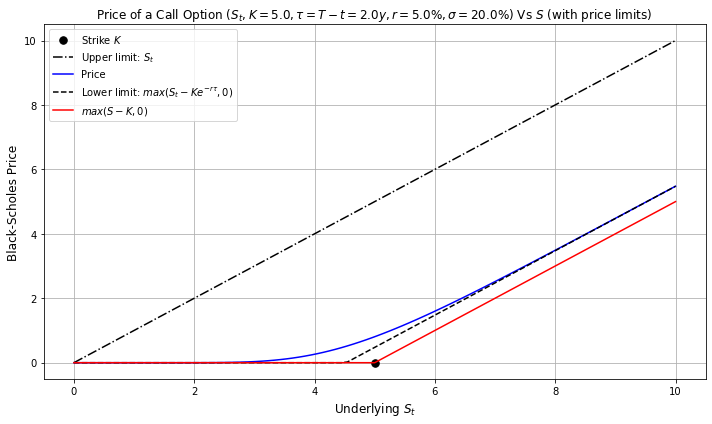

In [78]:
plot_price(call_focus, S_strip_focus, call_focus.tau)

in plotter `S` and `tau` attributes have been intentionally changed. But this might be something error prone.. name hiding

In [79]:
class CallOption(object):
    """
    CallOption class implementing payoff and pricing of a european call option.
    
    Attributes:
    -----------
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------            
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla call option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla call option price.
            
        price: float
            Computes the exact price of the option and returns it

    """
    
    def __init__(self, S_t, K, t, T, r, sigma):
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
    def __repr__(self):
        return r"CallOption(S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    # setters
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        return max(0.0, self.get_S() - self.get_K())

    # upper price limit
    def price_upper_limit(self):
        return self.get_S()

    # lower price limit
    def price_lower_limit(self):
        return max(self.get_S() - self.get_K()*np.exp(-self.get_r() * self.get_tau()), 0)
    
    # price calculation
    def price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        tau = self.get_tau()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price    

In [80]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [81]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [82]:
type(call)

__main__.CallOption

In [83]:
isinstance(call, CallOption)

True

In [84]:
# Raises: AttributeError: 'CallOption' object has no attribute '__S'
#
#call.__S

In [85]:
call.get_S()

90.0

In [86]:
call.set_S(105)

In [87]:
call.get_S()

105

In [88]:
call.get_t()

datetime.datetime(2020, 4, 19, 0, 0)

In [89]:
call.get_T()

datetime.datetime(2020, 12, 31, 0, 0)

In [90]:
call.get_tau()

0.7013698630136986

In [91]:
call.set_t("01-06-2020")

In [92]:
call.get_t()

datetime.datetime(2020, 6, 1, 0, 0)

In [93]:
# Raises: AttributeError: 'CallOption' object has no attribute '__update_tau'
#
# call.__update_tau()

In [94]:
call.get_tau() # tau gets updated automatically

0.5835616438356165

In [95]:
(call.get_T() - call.get_t()).days / 365 # consistency check

0.5835616438356165

In [96]:
call.set_tau(1.0)

In [97]:
call.get_tau()

1.0

In [98]:
# Raises: AttributeError: 'CallOption' object has no attribute '__update_T'
#
# call.__update_T()

In [99]:
call.get_T() # expiration date gets updated automatically

datetime.datetime(2021, 6, 1, 0, 0)

In [100]:
(call.get_T() - call.get_t()).days / 365 # consistency check

1.0

In [101]:
call = CallOption(S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [102]:
call

CallOption(S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [103]:
def plot_price_strip(option, S_list, tau_list):
    """
    plot_price_strip(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau_list (List):     list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i]) # reset the time to maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label="$max(S-K, 0)$")

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

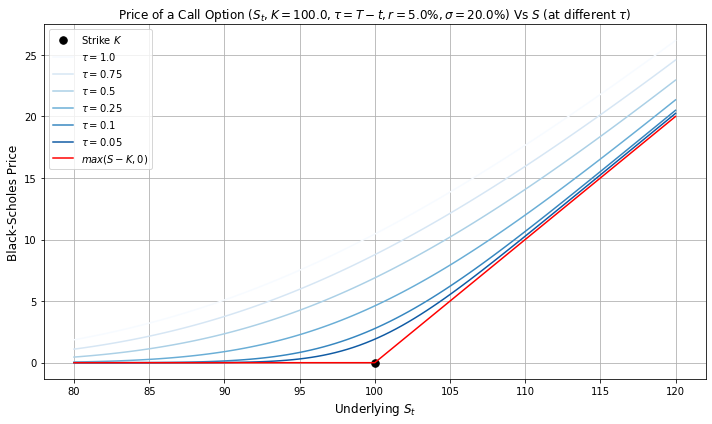

In [104]:
plot_price_strip(call, S_strip, tau_strip)

In [105]:
def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau_list) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (CallOption): instance of CallOption class;
        S_list (List):       list of underlying values;
        tau (float):         time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # setting legend labels
    upper_limit_label = r"Upper limit: $S_t$"
    payoff_label      =r"$max(S - K, 0)$"
    lower_limit_label = r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
        
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=upper_limit_label)
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=lower_limit_label)
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=payoff_label)

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a Call Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.get_K(), option.get_tau(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend
    ax.legend(loc='upper left', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [106]:
call_focus = CallOption(S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

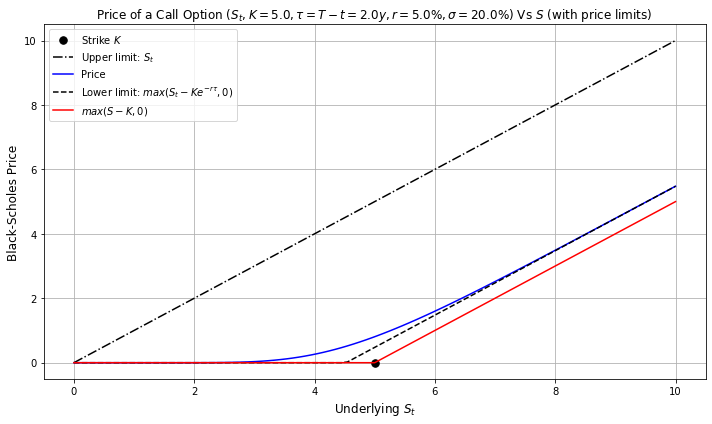

In [107]:
plot_price(call_focus, S_strip_focus, call_focus.get_tau())

Put options (also info labels)

In [108]:
class PlainVanillaOption(object):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    def __init__(self, option_type, S_t, K, t, T, r, sigma):

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_type(self):
        return self.__type
    
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label]    
    
    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity calculation
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return max(0.0, self.get_S() - self.get_K())
        # put case
        else:
            return max(0.0, self.get_K() - self.get_S())

    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_S()
        # put case
        else:
            return self.get_K()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return max(self.get_S() - self.get_K()*np.exp(-self.get_r() * self.get_tau()), 0)
        # put case
        else:
            return max(self.get_K()*np.exp(-self.get_r() * self.get_tau()) - self.get_S(), 0)
            
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.__put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        tau = self.get_tau()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price() + self.get_K() * np.exp(- self.get_r() * self.get_tau()) - self.get_S()        

In [109]:
call = PlainVanillaOption(option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [110]:
type(call)

__main__.PlainVanillaOption

In [111]:
isinstance(call, PlainVanillaOption)

True

In [112]:
call.price()

3.487402470943657

In [113]:
put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
put

PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [114]:
type(call)

__main__.PlainVanillaOption

In [115]:
isinstance(call, PlainVanillaOption)

True

In [116]:
put.price()

10.041330587465126

In [117]:
put.payoff()

10.0

In [118]:
# Raises: NotImplementedError: Option Type: 'other' does not exist!
#
# PlainVanillaOption(option_type='other', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)

In [119]:
def plot_price_strip(option, S_list, tau_list):
    """
    plot_price_strip(option, S_list, tau_list) plot option prices for underlying and maturities in 'S_list' and 'tau_list',
    respectively.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau_list (List):             list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
        
    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i]) # reset of time to maturity
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()

    ax.plot(S_list, payoff, 'r-', lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(option.get_type(), option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)
        
    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [120]:
call = PlainVanillaOption(option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

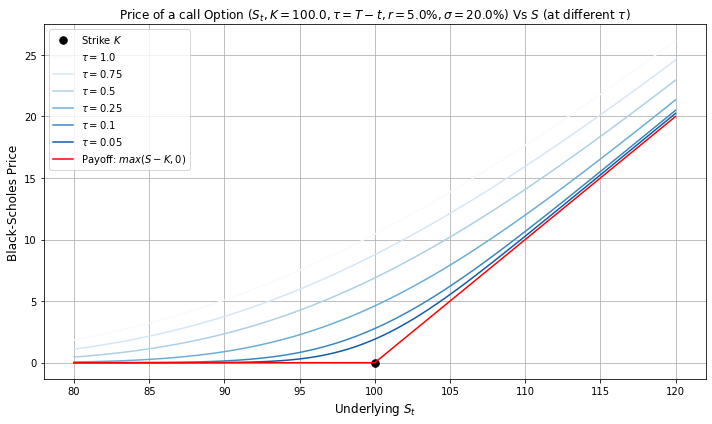

In [121]:
plot_price_strip(call, S_strip, tau_strip)

In [122]:
put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
put

PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

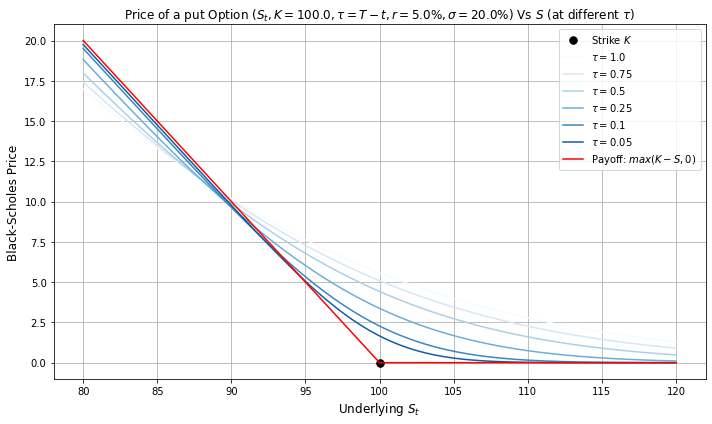

In [123]:
plot_price_strip(put, S_strip, tau_strip)

In [124]:
def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau (float):                 time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=option.get_docstring('price_upper_limit'))
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=option.get_docstring('price_lower_limit'))
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(option.get_type(), option.get_K(), option.get_tau(), option.get_r()*100, option.get_sigma()*100), 
                 fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [125]:
call_focus = PlainVanillaOption(option_type='call', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

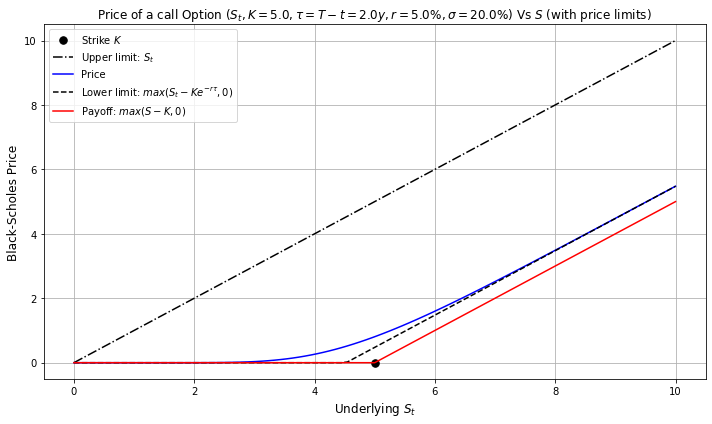

In [126]:
plot_price(call_focus, S_strip_focus, call_focus.get_tau())

In [127]:
put_focus = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.05, sigma=0.2)

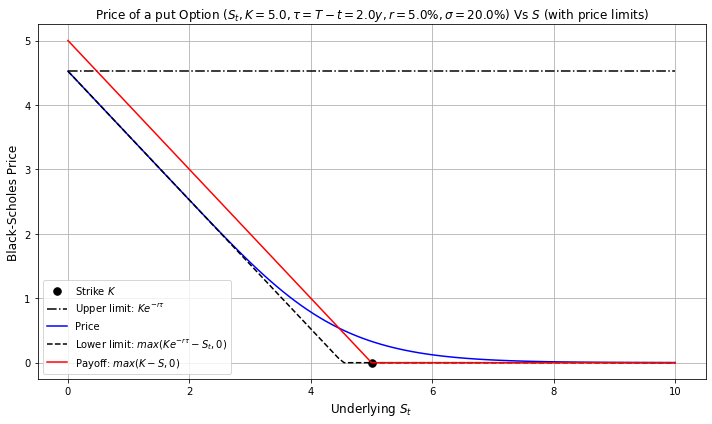

In [128]:
plot_price(put_focus, S_strip_focus, put_focus.get_tau())

this cross is due to interest rates. In nowadays scenarios, rates are typically extremely low (when not negative). Let's see that the crossing disappears for $r=0$

In [129]:
call_focus_zero_rates = PlainVanillaOption(option_type='call', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.0, sigma=0.2)

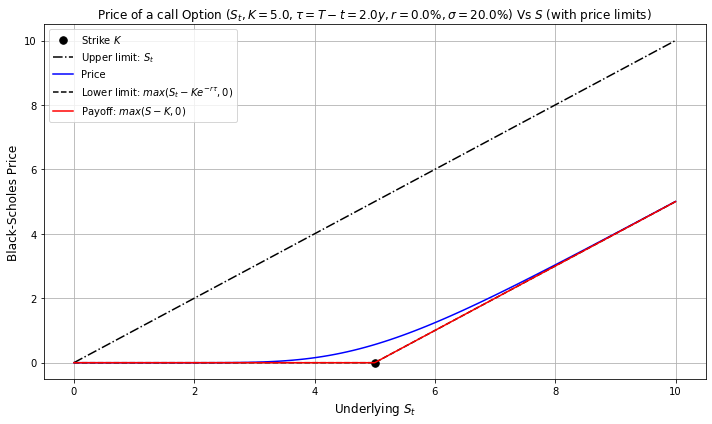

In [130]:
plot_price(call_focus_zero_rates, S_strip_focus, call_focus_zero_rates.get_tau())

In [131]:
put_focus_zero_rates = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=0.0, sigma=0.2)

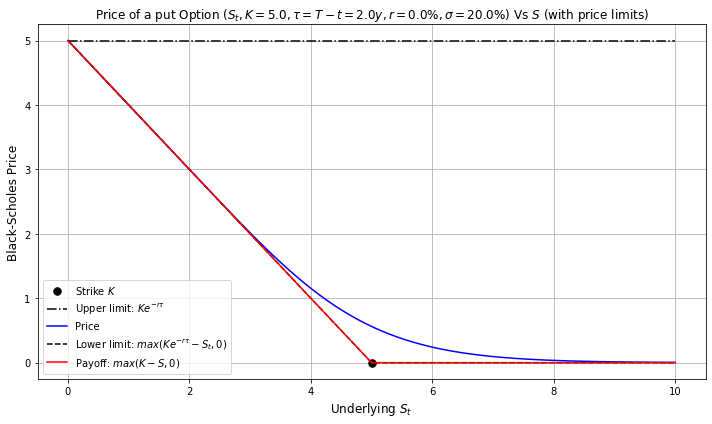

In [132]:
plot_price(put_focus_zero_rates, S_strip_focus, put_focus_zero_rates.get_tau())

Nothing is preventing us to consider even negative rates, as is common nowday. Let's use a unrealistic $r = -5\%$ just to magnify the result graphically.

In [133]:
call_focus_negative_rates = PlainVanillaOption(option_type='call', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=-0.05, sigma=0.2)

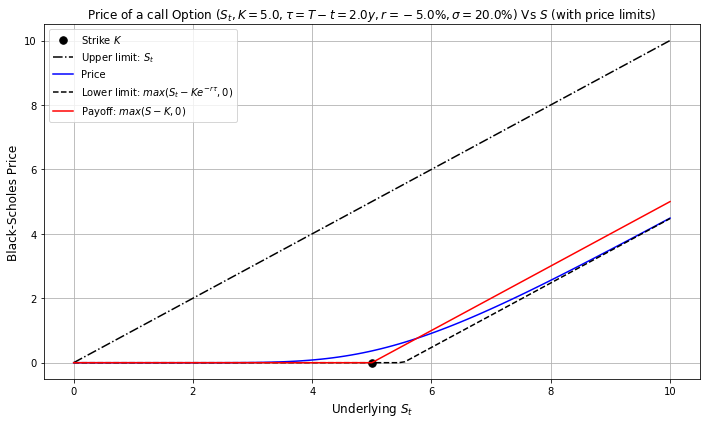

In [134]:
plot_price(call_focus_negative_rates, S_strip_focus, call_focus_negative_rates.get_tau())

In [135]:
put_focus_negative_rates = PlainVanillaOption(option_type='put', S_t=3.0, K=5.0, t="19-04-2020", T="19-04-2022", r=-0.05, sigma=0.2)

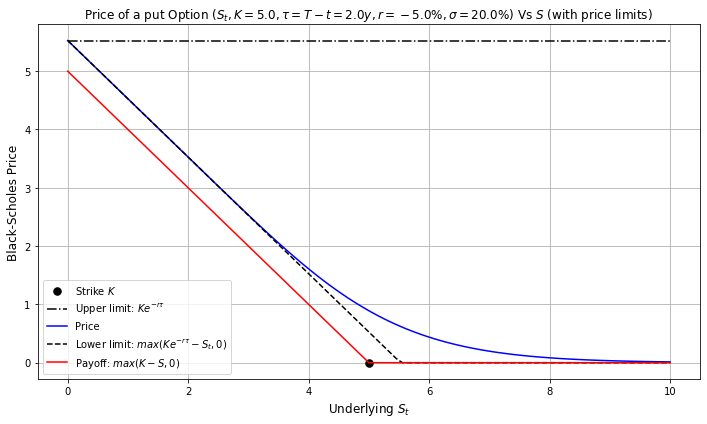

In [136]:
plot_price(put_focus_negative_rates, S_strip_focus, put_focus_negative_rates.get_tau())

Let's now implement an analogous class for Cash-Or-Nothing Digital calls and puts (aka Binary).

In [137]:
class DigitalOption(object):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        Q (float):                cash amount
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a CON digital option price.

        price_lower_limit: float 
            Returns the lower limit for a CON digital option price
            .
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    def __init__(self, option_type, cash_amount, S_t, K, t, T, r, sigma):

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__Q     = cash_amount
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_type(self):
        return self.__type
    
    def get_Q(self):
        return self.__Q
    
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label]    
    
    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
    
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
        
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return self.get_Q() * int(self.get_S() > self.get_K())
        # put case
        else:
            return self.get_Q() * int(self.get_S() <= self.get_K())
        
    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_Q()*np.exp(-self.get_r() * self.get_tau())
        # put case
        else:
            return self.get_Q()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return 0.0
        # put case
        else:
            return 0.0
        
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.__put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        tau = self.get_tau()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * self.get_tau()) - self.__call_price()        

In [138]:
CON_Call = DigitalOption(option_type='call', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Call

DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [139]:
type(CON_Call)

__main__.DigitalOption

In [140]:
isinstance(CON_Call, DigitalOption)

True

In [141]:
CON_Call.price()

0.29674605684957245

In [142]:
CON_Put = DigitalOption(option_type='put', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Put

DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [143]:
type(CON_Put)

__main__.DigitalOption

In [144]:
isinstance(CON_Put, DigitalOption)

True

In [145]:
CON_Put.price()

0.6687932243156424

In [146]:
CON_Put.payoff()

1.0

In [147]:
def plot_price_strip(option, S_list, tau_list):
    """
    plot_price_strip(option, S_list, tau_list) plot Plain-Vanilla or Cash-Or-Nothing option prices for underlying and 
    maturities in 'S_list' and 'tau_list', respectively.

    Parameters:
        option (PlainVanillaOption; DigitalOption): instance of PlainVanillaOption or DigitalOption class;
        S_list (List):                              list of underlying values;
        tau_list (List):                            list of times to maturity (in years);
        
    Returns:
        None;

    """

    # color cycle setup: basically a cycle of different shades of blue as many time to maturity there are
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(tau_list)+1)))
    
    # setting legend labels
    # plain vanilla case:
    if isinstance(option, PlainVanillaOption):
        title_label = "Plain Vanilla"
    # digital case:
    else:
        title_label = "Cash-Or-Nothing ($Q={}$)".format(option.get_Q())

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))

    # auxiliary variables
    numS = len(S_list)
    numTau = len(tau_list)

    # plot a dot to highlight the strike position
    ax.plot(K, 0, 'k.', ms=15, label="Strike $K$")

    # plot the price for different underlying values, one line for each different time to maturity tau
    for i in np.arange(numTau)[::-1]: # loop over reversed range
        
        option.set_tau(tau_list[i])
        price = np.zeros(numS)
        
        for j in np.arange(numS):
            option.set_S(S_list[j]) # reset of underlying value
            price[j] = option.price()
        
        ax.plot(S_list, price, '-', lw=1.5, label=r"$\tau={}$".format(option.get_tau()))
    
    # plot the red payoff line for different underlying values
    payoff = np.zeros(numS)
    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        payoff[i] = option.payoff()
    
    ax.plot(S_list, payoff, 'r-',  lw=1.5, label=option.get_docstring('payoff'))
    
    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} {} Option $(S_t, K={}, \tau=T-t, r={}\%, \sigma={}\%)$ Vs $S$ (at different $\tau$)".
                 format(title_label, option.get_type(), option.get_K(), option.get_r()*100, option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)
        
    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [148]:
CON_Call = DigitalOption(option_type='call', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Call

DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

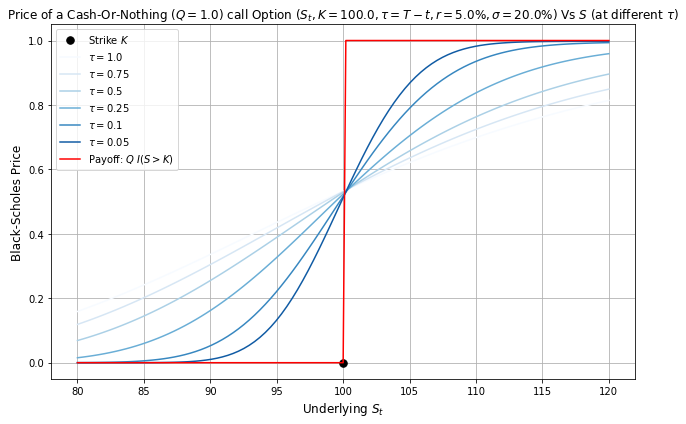

In [149]:
plot_price_strip(CON_Call, S_strip, tau_strip)

In [150]:
CON_Put = DigitalOption(option_type='put', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Put

DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

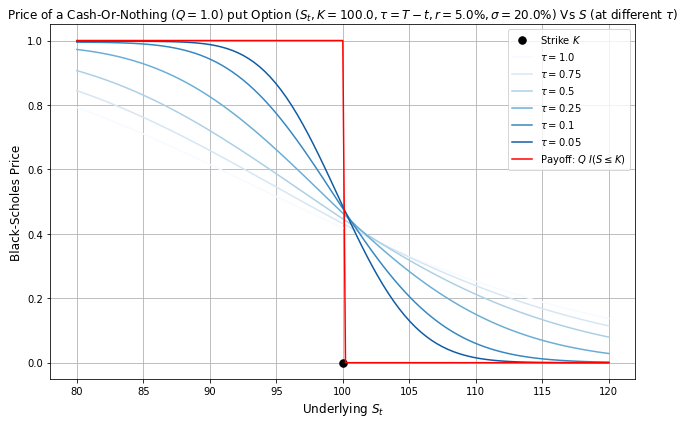

In [151]:
plot_price_strip(CON_Put, S_strip, tau_strip)

In [152]:
def plot_price(option, S_list, tau):
    """
    plot_price(option, S_list, tau) plot option prices for underlying in 'S_list' and time to maturity 'tau'.

    Parameters:
        option (PlainVanillaOption): instance of PlainVanillaOption class;
        S_list (List):               list of underlying values;
        tau (float):                 time to maturity (in years);
        
    Returns:
        None;

    """

    # define the figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # setting legend labels
    # plain vanilla case:
    if isinstance(option, PlainVanillaOption):
        title_label = "Plain Vanilla"
    # digital case:
    else:
        title_label = "Cash-Or-Nothing ($Q={}$)".format(option.get_Q())
            
    # auxiliary variable
    numS = len(S_list)

    # plot a dot to highlight the strike position
    ax.plot(option.get_K(), 0, 'k.', ms=15, label="Strike $K$")

    # plot the upper limit, the price and the lower limit for different underlying values
    upper_limit = np.zeros(numS)
    price       = np.zeros(numS)
    lower_limit = np.zeros(numS)
    payoff      = np.zeros(numS)

    for i in np.arange(numS):
        option.set_S(S_list[i]) # reset of underlying value
        
        upper_limit[i] = option.price_upper_limit()
        price[i]       = option.price()
        lower_limit[i] = option.price_lower_limit()
        payoff[i]      = option.payoff()

    ax.plot(S_list, upper_limit, 'k-.', lw=1.5, label=option.get_docstring('price_upper_limit'))
    ax.plot(S_list, price,       'b-',  lw=1.5, label=r"Price")
    ax.plot(S_list, lower_limit, 'k--', lw=1.5, label=option.get_docstring('price_lower_limit'))
    ax.plot(S_list, payoff,      'r-',  lw=1.5, label=option.get_docstring('payoff'))

    # set axis labels 
    ax.set_xlabel('Underlying $S_t$', fontsize=12) 
    ax.set_ylabel('Black-Scholes Price', fontsize=12) 

    # set title
    ax.set_title(r"Price of a {} {} Option $(S_t, K={}, \tau=T-t={:.1f}y, r={}\%, \sigma={}\%)$ Vs $S$ (with price limits)".
                 format(title_label, option.get_type(), option.get_K(), option.get_tau(), option.get_r()*100, 
                        option.get_sigma()*100), fontsize=12) 

    # add the legend ('best' loc parameters places the legend in the best position automatically)
    ax.legend(loc='best', ncol=1)

    # add a gride to ease visualization
    plt.grid(True)

    # show the plot
    fig.tight_layout()
    plt.show()

In [153]:
CON_Call_focus = DigitalOption(option_type='call', 
                               cash_amount=1.0, 
                               S_t=3.0, 
                               K=5.0, 
                               t="19-04-2020", 
                               T="19-04-2022", 
                               r=0.05, 
                               sigma=0.2)

CON_Call_focus

DigitalOption('call', cash=1.0, S_t=3.0, K=5.0, t=19-04-2020, T=19-04-2022, tau=2.00y, r=5.0%, sigma=20.0%)

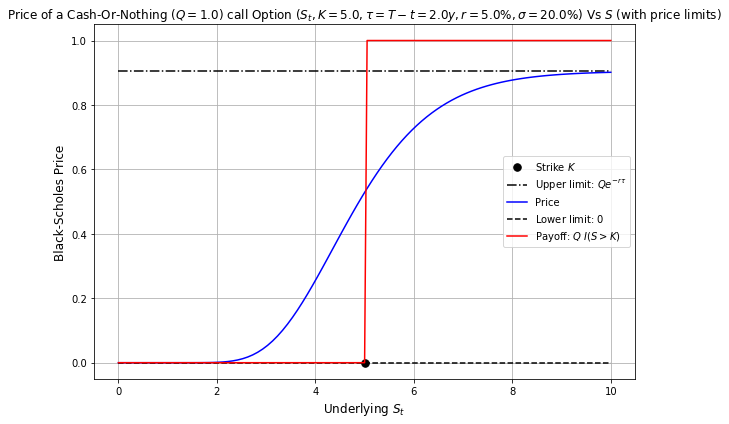

In [154]:
plot_price(CON_Call_focus, S_strip_focus, CON_Call_focus.get_tau())

In [155]:
CON_Put_focus = DigitalOption(option_type='put', 
                               cash_amount=1.0, 
                               S_t=3.0, 
                               K=5.0, 
                               t="19-04-2020", 
                               T="19-04-2022", 
                               r=0.05, 
                               sigma=0.2)

CON_Put_focus

DigitalOption('put', cash=1.0, S_t=3.0, K=5.0, t=19-04-2020, T=19-04-2022, tau=2.00y, r=5.0%, sigma=20.0%)

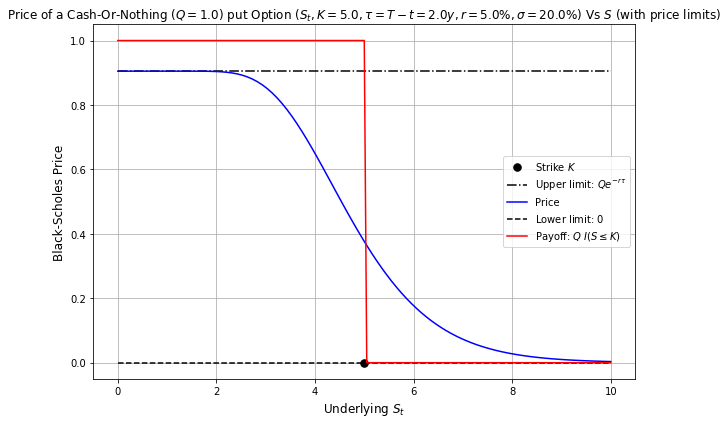

In [156]:
plot_price(CON_Put_focus, S_strip_focus, CON_Put_focus.get_tau())

# Inheritance and polymorphism

- A PlainVanillaOption _is a_ EuropeanOption
- A DigitalOption _is a_ EuropeanOption

In [157]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all common attributes
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.

    """
    
    def __init__(self, option_type, S_t, K, t, T, r, sigma):
        
        print("Calling the EuropeanOption constructor!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = S_t
        self.__K     = K
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = r
        self.__sigma = sigma
        
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type
        
    def get_S(self):
        return self.__S
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau
    
    def get_r(self):
        return self.__r

    def get_sigma(self):
        return self.__sigma
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_S(self, S):
        self.__S = S
        
    def set_K(self, K):
        self.__K = K
    
    def set_t(self, t):
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        # update time to maturity, given changed t, to keep internal consistency
        self.__update_tau() 

    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        # we could have updated valuation date as well, but this is a stylistic choice
        self.__update_T()

    def set_r(self, r):
        self.__r = r

    def set_sigma(self, sigma):
        self.__sigma = sigma
        
    # update methods (private)
    def __update_tau(self):
        self.__tau = self.__time_to_maturity()

    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()     

In [158]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    # initializer with default arguments
    def __init__(self, option_type='call', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2):    
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(option_type, S_t, K, t, T, r, sigma)
        
        # additional stuff - PlainVanillaOption-specific

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return max(0.0, self.get_S() - self.get_K())
        # put case
        else:
            return max(0.0, self.get_K() - self.get_S())

    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_S()
        # put case
        else:
            return self.get_K()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return max(self.get_S() - self.get_K()*np.exp(-self.get_r() * self.get_tau()), 0)
        # put case
        else:
            return max(self.get_K()*np.exp(-self.get_r() * self.get_tau()) - self.get_S(), 0)
            
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.__put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        tau = self.get_tau()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price() + self.get_K() * np.exp(- self.get_r() * self.get_tau()) - self.get_S()        

In [159]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        type (str):               type of the options. Can be either 'call' or 'put';
        Q (float):                cash amount
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        K (float):                strike price;
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                continuously compounded short-rate;
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getter and setter for cash amount attribute
        
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a CON digital option price.

        price_lower_limit: float 
            Returns the lower limit for a CON digital option price
            .
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    """
    
    # initializer with default arguments    
    def __init__(self, option_type='call', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2):
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(option_type, S_t, K, t, T, r, sigma)        

        # additional stuff - DigitalOption-specific
        self.__Q = cash_amount
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_Q(self):
        return self.__Q
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation
    def payoff(self):
        # call case
        if self.get_type() == 'call':
            return self.get_Q() * int(self.get_S() > self.get_K())
        # put case
        else:
            return self.get_Q() * int(self.get_S() <= self.get_K())
        
    # upper price limit
    def price_upper_limit(self):
        # call case
        if self.get_type() == 'call':
            return self.get_Q()*np.exp(-self.get_r() * self.get_tau())
        # put case
        else:
            return self.get_Q()*np.exp(-self.get_r() * self.get_tau())

    # lower price limit
    def price_lower_limit(self):
        # call case
        if self.get_type() == 'call':
            return 0.0
        # put case
        else:
            return 0.0
        
    # price calculation
    def price(self):
        # call case
        if self.get_type() == 'call':
            return self.__call_price()
        # put case
        else:
            return self.__put_price()
          
    def __call_price(self):
        
        # some local variables retrieved to be used repeatedly
        S = self.get_S()
        tau = self.get_tau()
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.payoff()
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * self.get_tau()) - self.__call_price()        

In [160]:
Vanilla_Call = PlainVanillaOption()
Vanilla_Call

Calling the EuropeanOption constructor!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [161]:
type(Vanilla_Call)

__main__.PlainVanillaOption

In [162]:
isinstance(Vanilla_Call, PlainVanillaOption)

True

In [163]:
Vanilla_Call.get_K()

100.0

In [164]:
Vanilla_Call.price()

3.487402470943657

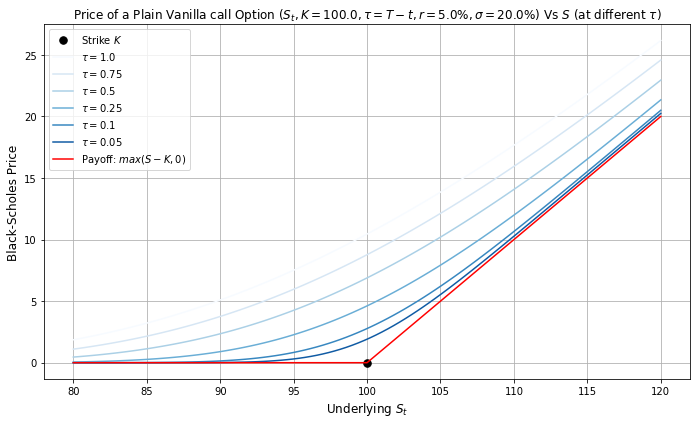

In [165]:
plot_price_strip(Vanilla_Call, S_strip, tau_strip)

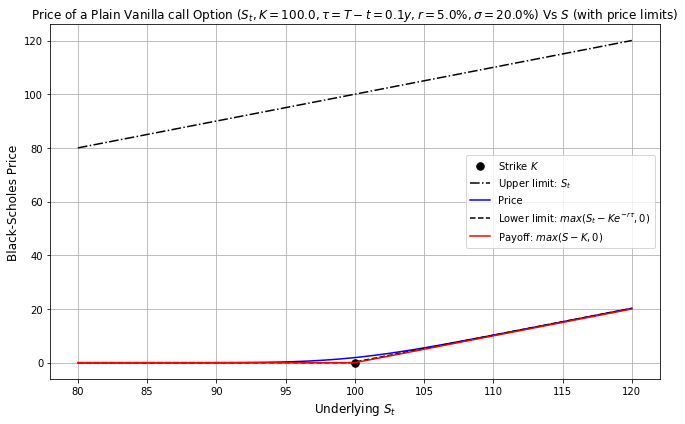

In [166]:
plot_price(Vanilla_Call, S_strip, Vanilla_Call.get_tau())

In [167]:
Vanilla_Put = PlainVanillaOption(option_type='put', S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
Vanilla_Put

Calling the EuropeanOption constructor!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

which is equivalent to

In [168]:
Vanilla_Put = PlainVanillaOption(option_type='put')
Vanilla_Put

Calling the EuropeanOption constructor!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [169]:
type(Vanilla_Put)

__main__.PlainVanillaOption

In [170]:
isinstance(Vanilla_Put, PlainVanillaOption)

True

In [171]:
Vanilla_Put.get_K()

100.0

In [172]:
Vanilla_Put.price()

10.041330587465126

In [173]:
Vanilla_Put.payoff()

10.0

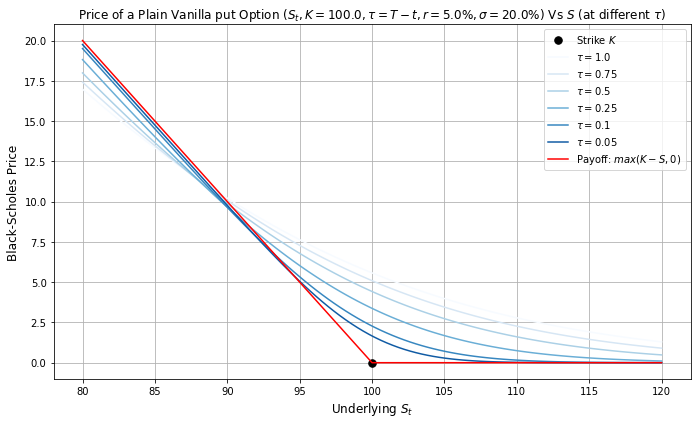

In [174]:
plot_price_strip(Vanilla_Put, S_strip, tau_strip)

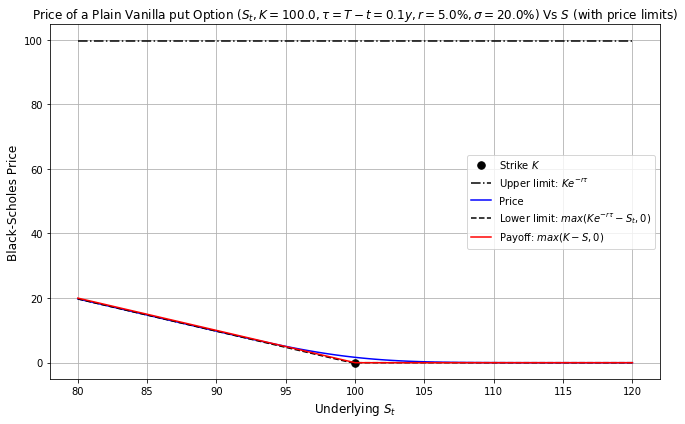

In [175]:
plot_price(Vanilla_Put, S_strip, Vanilla_Put.get_tau())

let's now instantiate a digital option

In [176]:
CON_Call = DigitalOption()
CON_Call

Calling the EuropeanOption constructor!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [177]:
type(CON_Call)

__main__.DigitalOption

In [178]:
isinstance(CON_Call, DigitalOption)

True

In [179]:
CON_Call.get_K()

100.0

In [180]:
CON_Call.get_Q()

1.0

In [181]:
CON_Call.price()

0.29674605684957245

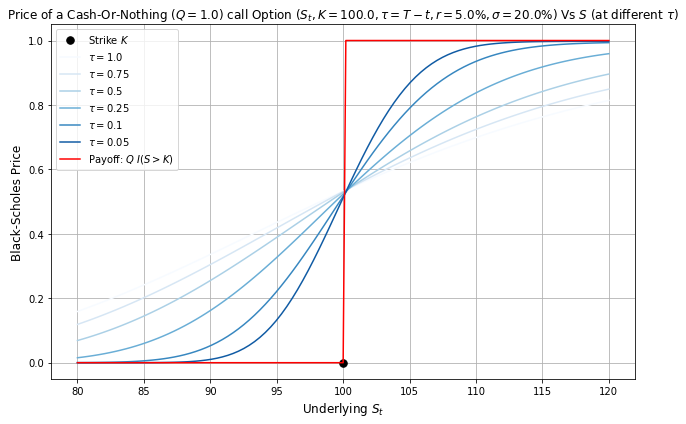

In [182]:
plot_price_strip(CON_Call, S_strip, tau_strip)

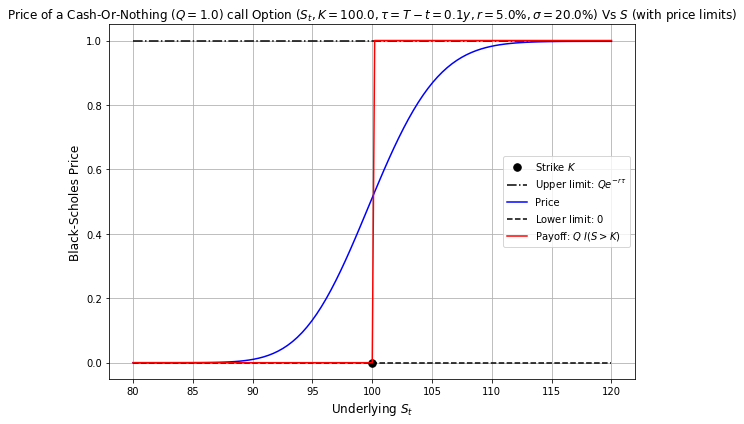

In [183]:
plot_price(CON_Call, S_strip, CON_Call.get_tau())

In [184]:
CON_Put = DigitalOption(option_type='put', cash_amount = 1.0, S_t=90.0, K=100.0, t="19-04-2020", T="31-12-2020", r=0.05, sigma=0.2)
CON_Put

Calling the EuropeanOption constructor!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

equivalent to

In [185]:
CON_Put = DigitalOption(option_type='put')
CON_Put

Calling the EuropeanOption constructor!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [186]:
type(CON_Put)

__main__.DigitalOption

In [187]:
isinstance(CON_Put, DigitalOption)

True

In [188]:
CON_Put.get_K()

100.0

In [189]:
CON_Put.get_Q()

1.0

In [190]:
CON_Put.price()

0.6687932243156424

In [191]:
CON_Put.payoff()

1.0

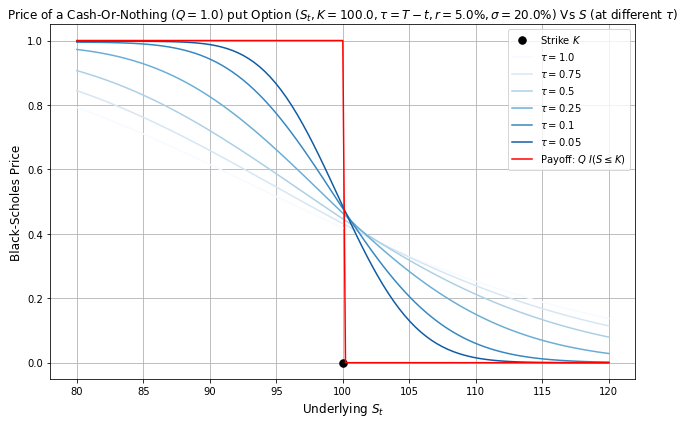

In [192]:
plot_price_strip(CON_Put, S_strip, tau_strip)

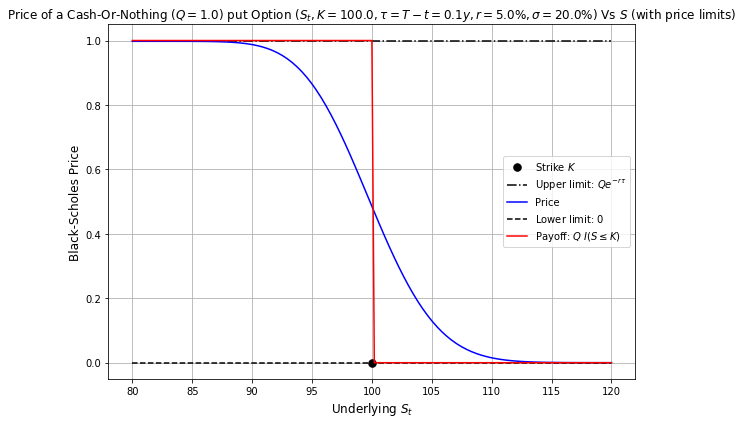

In [193]:
plot_price(CON_Put, S_strip, CON_Put.get_tau())

## `*args` and `**kwargs`

In [194]:
def print_args(*args):
    for arg in args:
        print(arg)

In [195]:
print_args("one", "two", "three")

one
two
three


In [196]:
print_args("one", "two", "three", "four")

one
two
three
four


If a function takes `*args` positional parameters, it also means that we can call it unpacking (through the `*` operator) a standard Tuple, like `tup` here

In [197]:
tup = ("a", 1, "c")

print_args(*tup)

a
1
c


This make it easier to make variable-length positional parameters flow through nested functions, like here:

In [198]:
def print_args_wrapper(*args):
    print("I am in print_args_wrapper function")
    # here args is a Tuple, that is un-packed by the * operator and passed to print_args function
    print_args(*args)

In [199]:
print_args_wrapper(tup)

I am in print_args_wrapper function
('a', 1, 'c')


In [200]:
def print_kwargs(**kwargs):
    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [201]:
print_kwargs(name="Jane", surname="Doe")

name: Jane
surname: Doe


In [202]:
print_kwargs(age=10)

age: 10


If a function takes `**args` keyword parameters, it also means that we can call it unpacking (through the `**` operator) a standard Dict, like `d` here

In [203]:
d = {"k1": "a", "k2": 1, "k3": "c"}

print_kwargs(**d)

k1: a
k2: 1
k3: c


This make it easier to make keyword parameters flow through nested functions, like here:

In [204]:
def print_kwargs_wrapper(**kwargs):
    print("I am in print_kwargs_wrapper function")
    # here kwargs is a Dict, that is un-packed in key-value pairs by the ** operator and passed to print_kwargs function
    print_kwargs(**kwargs)

In [205]:
print_kwargs_wrapper(**d)

I am in print_kwargs_wrapper function
k1: a
k2: 1
k3: c


If a function takes only `*args` and `**kwargs` as its parameters, it can be called with any set of parameters

In [206]:
def print_everything(*args, **kwargs):
    for arg in args:
        print(arg)

    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [207]:
print_everything("one", "two", "three")

one
two
three


In [208]:
print_everything(name="Jane", surname="Doe")

name: Jane
surname: Doe


In [209]:
print_everything("one", "two", "three", name="Jane", surname="Doe")

one
two
three
name: Jane
surname: Doe


This means also no parameters

In [210]:
print_everything()

As previously seen for `*args` and `**kwargs` separately, the use of `*args` and `**kwargs` make it easy to flow parameters through nested functions, like here:

In [211]:
def print_everything_wrapper(*args, **kwargs):
    print("I am in print_everything_wrapper function")
    # here args is a Tuple, that is un-packed by the * operator and passed to print_everything function
    # here kwargs is a Dict, that is un-packed in key-value pairs by the ** operator and passed to print_everything function
    print_everything(*args, **kwargs)

In [212]:
print_everything_wrapper(*tup, **d)

I am in print_everything_wrapper function
a
1
c
k1: a
k2: 1
k3: c


DA RISPIEGARE 

This makes it allows the nesting function `print_everything_wrapper` to ignore the details of the parameters of the nested function `print_everything`. This is particularly useful when the nesting function is the constructor (the `__init__()`) of a derived class and the nested function is the constructor of the base class (the `super().__init__()`).

`*args` and `**kwargs` can be mixed with ordinary parameters, which must come first in function's definition

In [213]:
def print_everything_combined(city, title="default_title", *args, **kwargs):
    
    print("city is {}".format(city))
    
    print("title is {}".format(title))
    
    for arg in args:
        print(arg)

    for k, v in kwargs.items():
        print("{}: {}".format(k, v))

In [214]:
print_everything_combined("Rome", "one", "two", "three", name="Jane", surname="Doe")

city is Rome
title is one
two
three
name: Jane
surname: Doe


In [215]:
print_everything_combined("Rome", "different title", "one", "two", "three", name="Jane", surname="Doe")

city is Rome
title is different title
one
two
three
name: Jane
surname: Doe


In [216]:
# raises: SyntaxError: positional argument follows keyword argument
#
# print_everything_combined(city="Rome", "one", "two", "three", name="Jane", surname="Doe")

# Polymorphism application: a `Plotter()` class

First let's define a common MarketEnvironment class which shall contain the information on market environment and underlying level. This class will be used to instantiate the EuropeanOption class

In [217]:
class MarketEnvironment:
    """
    MarketEnvironment class: setting the market environment: date, underlying level, volatility level and short-rate.
    
    Attributes:
    -----------
        t (str; dt.datetime):     valuation date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        r (float):                continuously compounded short-rate;
        S_t (float):              spot price of the underlying asset at the valuation date 't';
        sigma (float):            volatility of underlying asset;
    
    Public Methods:
    --------   
    
        getters and setters for all attributes
        
    Usage: 
    --------   
        - default: MarketEnvironment() is equivalent to 
                   MarketEnvironment(t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2)

        - general: MarketEnvironment(t="DD-MM-YYYY" String, r=Float, S_t=Float, sigma=Float)
    """
    
    def __init__(self, t="19-04-2020", r=0.05, S_t=90.0, sigma=0.2):
        
        print("Initializing the MarketEnvironment!")
        
        self.__t     = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t
        self.__r     = r
        self.__S     = S_t
        self.__sigma = sigma
        
    def __repr__(self):
        return r"MarketEnvironment(t={}, r={:.1f}%, S_t={:.1f}, sigma={:.1f}%)".\
               format(self.get_t().strftime("%d-%m-%Y"), self.get_r()*100, self.get_S(), self.get_sigma()*100)

    # getters
    def get_t(self):
        return self.__t

    def get_r(self):
        return self.__r

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    # setters 
    def set_t(self, t):
        # notice that there is no need to update the time-to-maturity of the options,
        # since in this way of modeling, the MarketEnvironment is the first thing that gets instantiated.
        # Financial instruments follow.
        self.__t = dt.datetime.strptime(t, "%d-%m-%Y") if isinstance(t, str) else t

    def set_r(self, r):
        self.__r = r

    def set_S(self, S):
        self.__S = S
        
    def set_sigma(self, sigma):
        self.__sigma = sigma

In [218]:
market_env = MarketEnvironment(t="01-06-2020", r=-0.002, S_t=10.0, sigma=0.4)
market_env

Initializing the MarketEnvironment!


MarketEnvironment(t=01-06-2020, r=-0.2%, S_t=10.0, sigma=40.0%)

In [219]:
market_env = MarketEnvironment()
market_env

Initializing the MarketEnvironment!


MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [220]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the option. Can be either 'call' or 'put';
        S_t (float):              'S' attribute of mkt_env.
        K (float):                strike price;
        t (str; dt.datetime):     't' attribute of mkt_env.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                'r' attribute of mkt_env.
        sigma (float):            'sigma' attribute of mkt_env.
    
    Template Methods:
    --------   
    
        getters for all common attributes
        
        setters for common attributes, not belonging to mkt_env
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.

    """

    def __init__(self, mkt_env, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = mkt_env.get_S()
        self.__K     = K
        self.__t     = mkt_env.get_t()
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = mkt_env.get_r()
        self.__sigma = mkt_env.get_sigma()
               
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau

    def get_r(self):
        return self.__r
    
    def get_sigma(self):
        return self.__sigma
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()

In [221]:
from collections.abc import Iterable

In [222]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: PlainVanillaOption(mkt_env) is equivalent to 
                   PlainVanillaOption(mkt_env, option_type='call', K=100.0, T="31-12-2020")

        - general: PlainVanillaOption(mkt_env, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """
    
    # initializer with optional *args and **kwargs parameters
    def __init__(self, *args, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(*args, **kwargs)
        
        # info strings
        self.__info = r"Plain Vanilla {} (K={:.1f}, tau={:.2f}y)".format(self.get_type(), self.get_K(), self.get_tau())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info

    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, s - self.get_K()) for s in S])
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, self.get_K() - s) for s in S])
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
                        
        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_K()*np.exp(-self.get_r() * tau), repeats=len(S)) 
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() and .get_tau()
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_lower_limit(S=100.0, tau=0.1)
            - price_lower_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_lower_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(s - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S])
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S])
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
               
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S     

In [223]:
Vanilla_Call = PlainVanillaOption(market_env, option_type='call', K=110.0, T="31-12-2022")
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [224]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [225]:
Vanilla_Call.payoff() # using .get_S() 

0.0

In [226]:
Vanilla_Call.payoff(90) # using args[0] for S

0.0

In [227]:
Vanilla_Call.payoff(S=90) # using kwargs['S'] for S

0.0

In [228]:
Vanilla_Call.payoff([90, 100.0]) # using args[0] for S (and list in input)

array([0., 0.])

In [229]:
Vanilla_Call.payoff(S=[90, 100.0]) # using kwargs['S'] for S (and list in input) 

array([0., 0.])

In [230]:
Vanilla_Call.price() # using .get_S() and .get_tau()

3.487402470943657

In [231]:
Vanilla_Call.price(90) # using args[0] for S

3.487402470943657

In [232]:
Vanilla_Call.price(90, 0.1) # using args[0] for S and args[1] for tau

0.1434251971537872

In [233]:
Vanilla_Call.price(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.1434251971537872

In [234]:
Vanilla_Call.price([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.1434252 , 2.77365415])

In [235]:
Vanilla_Call.price(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.1434252 , 2.77365415])

In [236]:
Vanilla_Call.price_upper_limit() # using .get_S() and .get_tau()

90.0

In [237]:
Vanilla_Call.price_upper_limit(90) # using args[0] for S

90

In [238]:
Vanilla_Call.price_upper_limit(90, 0.1) # using args[0] for S and args[1] for tau

90

In [239]:
Vanilla_Call.price_upper_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

90

In [240]:
Vanilla_Call.price_upper_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

[90, 100.0]

In [241]:
Vanilla_Call.price_upper_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

[90, 100.0]

In [242]:
Vanilla_Call.price_lower_limit() # using .get_S() and .get_tau()

0.0

In [243]:
Vanilla_Call.price_lower_limit(90) # using args[0] for S

0.0

In [244]:
Vanilla_Call.price_lower_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.0

In [245]:
Vanilla_Call.price_lower_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.0

In [246]:
Vanilla_Call.price_lower_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.        , 0.49875208])

In [247]:
Vanilla_Call.price_lower_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.        , 0.49875208])

the same can be done in the put case

In [248]:
Vanilla_Put = PlainVanillaOption(market_env, option_type='put')
Vanilla_Put

Initializing the EuropeanOption!


PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [249]:
Vanilla_Put.payoff() # using .get_S() 

10.0

etc

In [250]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        Q (float):                   cash amount
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: DigitalOption(mkt_env) is equivalent to 
                   DigitalOption(mkt_env, cash_amount=1.0, option_type='call', K=100.0, T="31-12-2020")

        - general: DigitalOption(mkt_env, cash_amount=Float, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """

    # initializer with optional *args and **kwargs parameters and default cash_amount
    # default keyword arguments (like cash_amount here) must go after args list argument in function def
    def __init__(self, *args, cash_amount=1.0, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(*args, **kwargs)
        
        # amount of cash in case of payment
        self.__Q = cash_amount    
        
        # info strings
        self.__info = r"CON {} (K={:.1f}, tau={:.2f}y, Q={:.1f})".format(self.get_type(), self.get_K(), self.get_tau(), self.get_Q())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_Q(self):
        return self.__Q
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s > self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s <= self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_Q()*np.exp(-self.get_r() * tau), repeats=len(S))
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() 
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(S=100.0)
            - price_lower_limit([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - price_lower_limit(S=[100.0, ..., 120.0])
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
            
        # call case
        if self.get_type() == 'call':
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        # put case
        else:
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
            
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [251]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [252]:
CON_Call = DigitalOption(market_env, cash_amount=1000.0)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1000.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [253]:
CON_Call = DigitalOption(market_env, option_type='call', K=110.0, T="31-12-2022")
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [254]:
CON_Call = DigitalOption(market_env, cash_amount=1000.0, option_type='call', K=110.0, T="31-12-2022")
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1000.0, S_t=90.0, K=110.0, t=19-04-2020, T=31-12-2022, tau=2.70y, r=5.0%, sigma=20.0%)

In [255]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [256]:
CON_Call.payoff() # using .get_S() 

0.0

In [257]:
CON_Call.payoff(90) # using args[0] for S

0.0

In [258]:
CON_Call.payoff(S=90) # using kwargs['S'] for S

0.0

In [259]:
CON_Call.payoff([90, 100.0]) # using args[0] for S (and list in input)

array([0., 0.])

In [260]:
CON_Call.payoff(S=[90, 100.0]) # using kwargs['S'] for S (and list in input) 

array([0., 0.])

In [261]:
CON_Call.price() # using .get_S() and .get_tau()

0.29674605684957245

In [262]:
CON_Call.price(90) # using args[0] for S

0.29674605684957245

In [263]:
CON_Call.price(90, 0.1) # using args[0] for S and args[1] for tau

0.05251830091808269

In [264]:
CON_Call.price(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.05251830091808269

In [265]:
CON_Call.price([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.0525183 , 0.51632829])

In [266]:
CON_Call.price(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.0525183 , 0.51632829])

In [267]:
CON_Call.price_upper_limit() # using .get_S() and .get_tau()

0.9655392811652148

In [268]:
CON_Call.price_upper_limit(90) # using args[0] for S

0.9655392811652148

In [269]:
CON_Call.price_upper_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.9950124791926823

In [270]:
CON_Call.price_upper_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.9950124791926823

In [271]:
CON_Call.price_upper_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0.99501248, 0.99501248])

In [272]:
CON_Call.price_upper_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0.99501248, 0.99501248])

In [273]:
CON_Call.price_lower_limit() # using .get_S() and .get_tau()

0.0

In [274]:
CON_Call.price_lower_limit(90) # using args[0] for S

0.0

In [275]:
CON_Call.price_lower_limit(90, 0.1) # using args[0] for S and args[1] for tau

0.0

In [276]:
CON_Call.price_lower_limit(S=90, tau=0.1) # using kwargs['S'] for S and kwargs['tau'] for tau

0.0

In [277]:
CON_Call.price_lower_limit([90, 100.0], tau=0.1) # using args[0] for S (and list in input) and args[1] for tau

array([0., 0.])

In [278]:
CON_Call.price_lower_limit(S=[90, 100.0], tau=0.1) # using kwargs['S'] for S (and list in input) and kwargs['tau'] for tau

array([0., 0.])

the same can be done in the put case

In [279]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [280]:
CON_Put.payoff() # using .get_S() 

1.0

etc

Let's now define a Plotter class

In [281]:
class Plotter():
    
    def __init__(self, FinancialInstrument, *args, **kwargs):

        # parse informations from FinancialInstrument
        self.fin_inst = FinancialInstrument
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market: " + self.fin_inst.get_mkt_info()

        # define x-axis 
        S_range = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.fin_inst.get_K()
        self.set_x_axis(S_range)

        # define multi-lines (different tau)
        multi_tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.fin_inst.get_tau()
        self.set_multi_tau(multi_tau)
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_tau(self):
        return self.__multi_tau

    def get_title(self):
        return self.__title_label
    
    # setters
    def set_x_axis(self, x):
        
        if isinstance(x, Iterable):
            self.__x_axis = x
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20
            
            self.__x_axis = np.linspace(x_min, x_max, 100)
    
    def set_multi_tau(self, tau):
        if isinstance(tau, Iterable) and len(tau) > 1:
            # sort and take the reversed array
            self.__multi_tau = np.sort(tau)[::-1]
        elif isinstance(tau, Iterable) and len(tau) == 1:
            self.__multi_tau = tau[0]
        else:
            self.__multi_tau = tau
                    
    def plot(self, *args, **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_multi_tau(args[1])
        elif 'tau' in kwargs:
            self.set_multi_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau)
        else:
            plot_limits = args[2] if len(args) > 2 else kwargs['plot_limits'] if 'plot_limits' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_limits)
            
    def __plot_multi_tau(self, S, multi_tau):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau)+1)))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:
            ax.plot(S, self.fin_inst.price(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # plot the red payoff line for different underlying values
        ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")

        # set axis labels 
        ax.set_xlabel('Underlying $S_t$', fontsize=12) 
        ax.set_ylabel('Black-Scholes Price', fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_limits):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed time-to-maturity. Possibly, it plots theoretical
        upper and lower bounds of the price.
        """

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        ax.plot(S, self.fin_inst.price(S, tau), 'b-', lw=1.5, label=r"Price")
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, tau), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, tau), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")

        # set axis labels 
        ax.set_xlabel('Underlying $S_t$', fontsize=12) 
        ax.set_ylabel('Black-Scholes Price', fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [282]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [283]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [284]:
option_plotter = Plotter(Vanilla_Call)

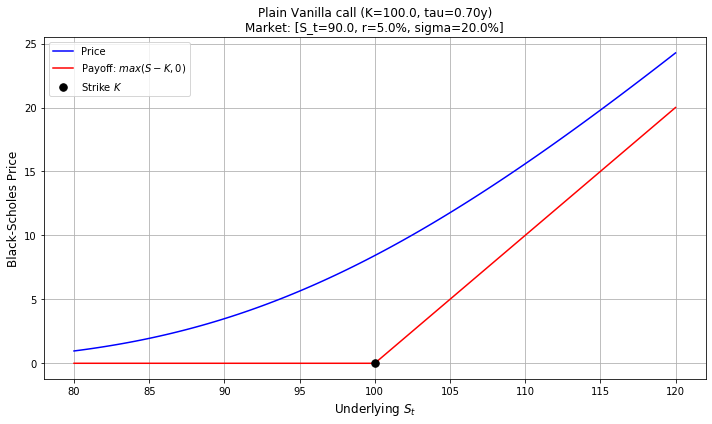

In [285]:
option_plotter.plot()

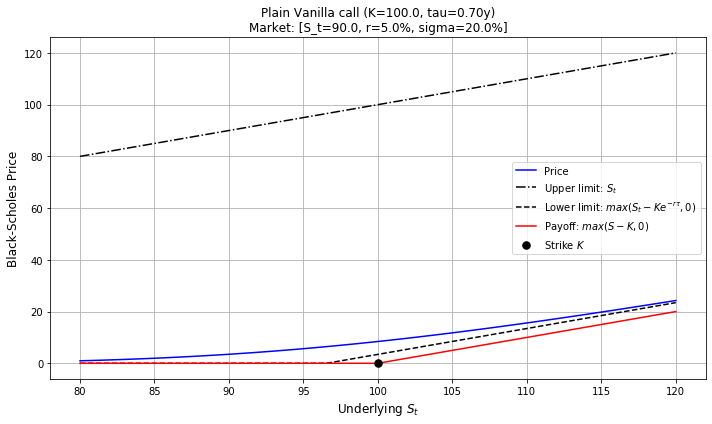

In [286]:
option_plotter.plot(plot_limits=True)

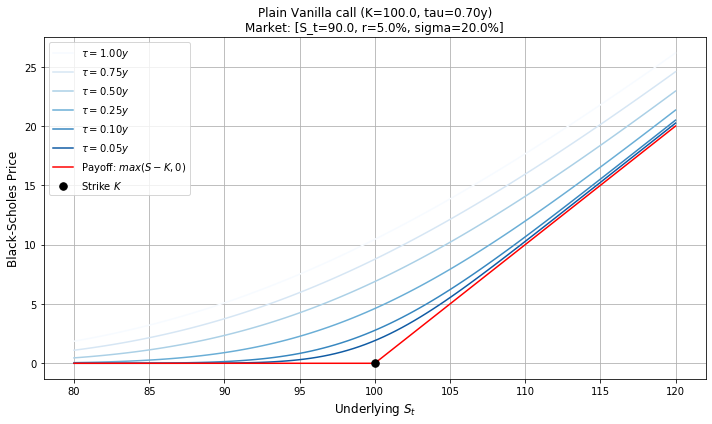

In [287]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

In [288]:
option_plotter = Plotter(Vanilla_Call, S=[80, 90, 100, 110, 120], tau=[0.01, 0.5, 1])

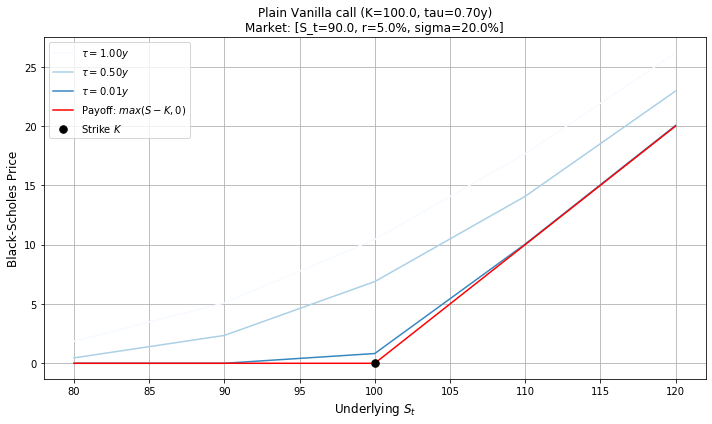

In [289]:
option_plotter.plot()

In [290]:
CON_Put = DigitalOption(market_env, option_type='put')
CON_Put

Initializing the EuropeanOption!


DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [291]:
option_plotter = Plotter(CON_Put)

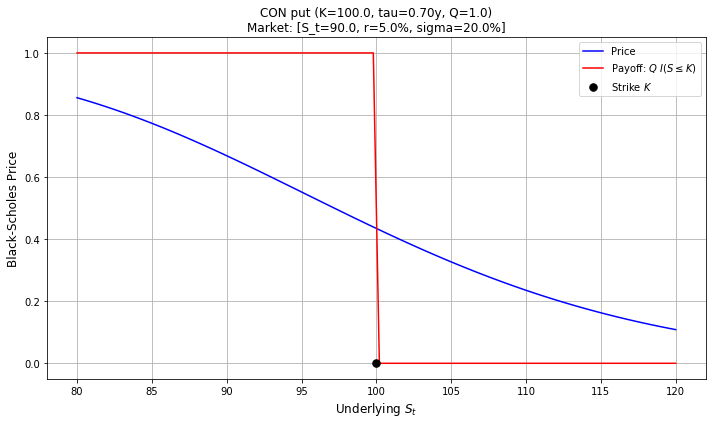

In [292]:
option_plotter.plot()

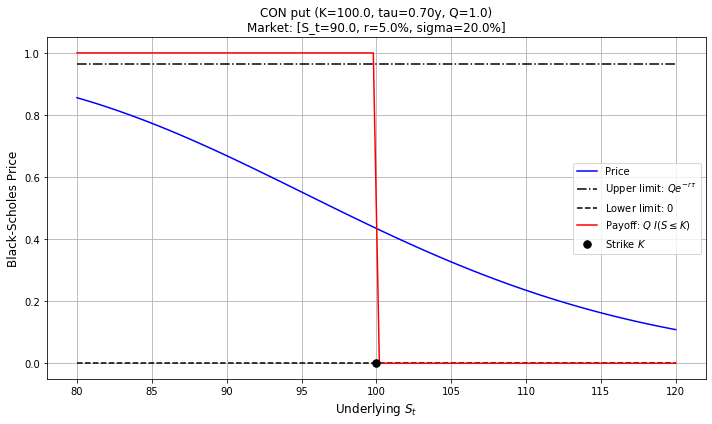

In [293]:
option_plotter.plot(plot_limits=True)

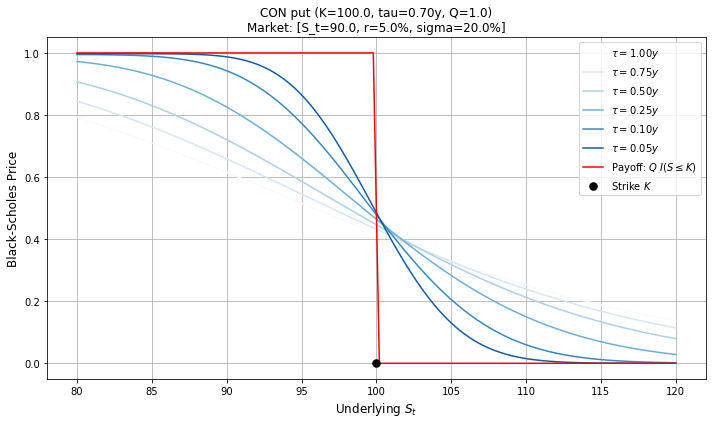

In [294]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

In [295]:
option_plotter = Plotter(CON_Put,  tau=[0.01, 0.5, 1])

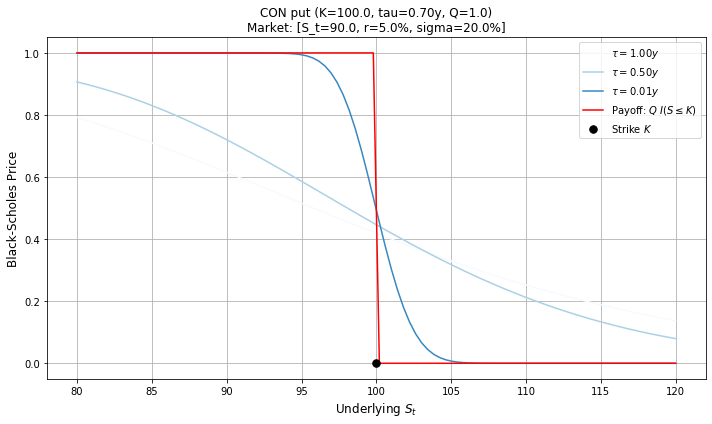

In [296]:
option_plotter.plot()

## _focus on:_ PnL

In [297]:
class EuropeanOption:
    """
    EuropeanOption abstract class: an interface setting the template for any option with european-style exercise.
    This class is not meant to be instantiated.
    
    Attributes:
    -----------
        type (str):               type of the option. Can be either 'call' or 'put';
        S_t (float):              'S' attribute of mkt_env.
        K (float):                strike price;
        t (str; dt.datetime):     't' attribute of mkt_env.
        T (str; dt.datetime):     expiration date. Can be either a "dd-mm-YYYY" String or a pd.datetime() object
        tau (float):              time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                'r' attribute of mkt_env.
        sigma (float):            'sigma' attribute of mkt_env.
    
    Template Methods:
    --------   
    
        getters for all common attributes
        
        setters for common attributes, not belonging to mkt_env
        
        payoff: float
            Template method for payoff. Raises NotImplementedError if called.

        price_upper_limit: float 
            Template method for upper limit. Raises NotImplementedError if called.

        price_lower_limit: float 
            Template method for lower limit. Raises NotImplementedError if called.
            
        price: float
            Template method for price. Raises NotImplementedError if called.

    """

    def __init__(self, mkt_env, option_type='call', K=100.0, T="31-12-2020"):
        
        print("Initializing the EuropeanOption!")

        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
        
        self.__type  = option_type
        self.__S     = mkt_env.get_S()
        self.__K     = K
        self.__t     = mkt_env.get_t()
        self.__T     = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        self.__tau   = self.__time_to_maturity()
        self.__r     = mkt_env.get_r()
        self.__sigma = mkt_env.get_sigma()
        
        # empty initial price of the option
        self.__initial_price = None
               
        # empty informations dictionary
        self.__docstring_dict = {}        
        
    # string representation method template
    def __repr__(self):
        raise NotImplementedError()
    
    # getters
    def get_type(self):
        return self.__type

    def get_S(self):
        return self.__S
    
    def get_sigma(self):
        return self.__sigma
    
    def get_K(self):
        return self.__K
    
    def get_t(self):
        return self.__t

    def get_T(self):
        return self.__T

    def get_tau(self):
        return self.__tau

    def get_r(self):
        return self.__r
    
    def get_sigma(self):
        return self.__sigma
    
    def get_initial_price(self):
        return NotImplementedError()
    
    # doctring getter template
    def get_docstring(self, label):
        raise NotImplementedError()

    # setters
    def set_type(self, option_type):
        self.__type = option_type
        
        # option type check
        if option_type not in ['call', 'put']:
            raise NotImplementedError("Option Type: '{}' does not exist!".format(option_type))
            
    def set_K(self, K):
        self.__K = K
    
    def set_T(self, T):
        self.__T = dt.datetime.strptime(T, "%d-%m-%Y") if isinstance(T, str) else T
        # update time to maturity, given changed T, to keep internal consistency
        self.__update_tau() 
    
    def set_tau(self, tau):
        self.__tau = tau
        # update expiration date, given changed tau, to keep internal consistency
        self.__update_T()
        
    def __update_T(self):
        self.__T = self.__t + dt.timedelta(days=math.ceil(self.__tau*365))

    # time to maturity method (private)
    def __time_to_maturity(self):
        return (self.__T - self.__t).days / 365.0
    
    # payoff template
    def payoff(self):
        raise NotImplementedError()     
        
    # upper price limit template
    def price_upper_limit(self):
        raise NotImplementedError()     

    # lower price limit template
    def price_lower_limit(self):
        raise NotImplementedError()     
        
    # price template
    def price(self):
        raise NotImplementedError()
        
    # profit and loss calculation calculation - with optional *args and **kwargs parameters
    def PnL(self, *args, **kwargs):
        """
        Can be called as:
            - PnL(): uses .get_S() and .get_tau()
            - PnL(100.0): S == 100.0
            - PnL(100.0, 0.1): S == 100.0 and tau == 0.1
            - PnL(S=100.0, tau=0.1)
            - PnL([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - PnL(S=[100.0, ..., 120.0], tau=0.1)
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
        
        # P&L at option's expiration, that is the PnL if the option is kept until maturity
        if tau == 0.0:
            # P&L = payoff - initial price
            return self.payoff(S) - self.get_initial_price()
        
        # if tau > 0, this is the P&L before option's expiration on balance due to an outstanding option contract
        else:
            # P&L = current price - initial price
            return self.price(S, tau) - self.get_initial_price()

In [298]:
class PlainVanillaOption(EuropeanOption):
    """
    PlainVanillaOption class implementing payoff and pricing of plain-vanilla call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: PlainVanillaOption(mkt_env) is equivalent to 
                   PlainVanillaOption(mkt_env, option_type='call', K=100.0, T="31-12-2020")

        - general: PlainVanillaOption(mkt_env, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """
    
    # initializer with optional *args and **kwargs parameters
    def __init__(self, *args, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(PlainVanillaOption, self).__init__(*args, **kwargs)
        
        # info strings
        self.__info = r"Plain Vanilla {} (K={:.1f}, tau={:.2f}y)".format(self.get_type(), self.get_K(), self.get_tau())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # initial price of the option
        self.__initial_price = self.price()
        
        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $S_t$",
                'payoff':            r"Payoff: $max(S-K, 0)$",
                'price_lower_limit': r"Lower limit: $max(S_t - K e^{-r \tau}, 0)$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $K e^{-r \tau}$",
                'payoff':            r"Payoff: $max(K-S, 0)$",
                'price_lower_limit': r"Lower limit: $max(K e^{-r \tau} - S_t, 0)$"}
        }
                
    def __repr__(self):
        return r"PlainVanillaOption('{}', S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_initial_price(self):
        return self.__initial_price

    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
                
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)
    
    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, s - self.get_K()) for s in S])
        else:
            return max(0.0, S - self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([max(0.0, self.get_K() - s) for s in S])
        else:
            return max(0.0, self.get_K() - S)
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
                        
        # call case
        if self.get_type() == 'call':
            return S
        # put case
        else:
            return self.__put_price_upper_limit(S, tau)
    
    def __put_price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_K()*np.exp(-self.get_r() * tau), repeats=len(S)) 
        else:
            return self.get_K()*np.exp(-self.get_r() * tau)

    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() and .get_tau()
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_lower_limit(S=100.0, tau=0.1)
            - price_lower_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_lower_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
                                       
        # call case
        if self.get_type() == 'call':
            return self.__call_price_lower_limit(S, tau)
        # put case
        else:
            return self.__put_price_lower_limit(S, tau)

    def __call_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(s - self.get_K()*np.exp(-self.get_r() * tau), 0.0) for s in S])
        else:
            return max(S - self.get_K()*np.exp(-self.get_r() * tau), 0.0)
                                       
    def __put_price_lower_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.array([max(self.get_K()*np.exp(-self.get_r() * tau) - s, 0.0) for s in S])
        else:
            return max(self.get_K()*np.exp(-self.get_r() * tau) - S, 0.0)
                                       
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
               
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
        
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = S * stats.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: Call + Ke^{-r*tau} = Put + S"""
        return self.__call_price(S, tau) + self.get_K() * np.exp(- self.get_r() * tau) - S     

In [299]:
class DigitalOption(EuropeanOption):
    """
    DigitalOption class implementing payoff and pricing of digital call and put options.
    Put price is calculated using put-call parity
    
    Attributes:
    -----------
        mkt_env (MarketEnvironment): Instance of MarketEnvironment class
        Q (float):                   cash amount
        type (str):                  From 'type' attribute of EuropeanOption base class.
        S_t (float):                 'S' attribute of mkt_env.
        K (float):                   From 'K' attribute of EuropeanOption base class.
        t (str; dt.datetime):        't' attribute of mkt_env.
        T (str; dt.datetime):        From 'T' attribute of EuropeanOption base class.
        tau (float):                 time to maturity in years, computed as tau=T-t by time_to_maturity() method
        r (float):                   'r' attribute of mkt_env.
        sigma (float):               'sigma' attribute of mkt_env.
    
    Public Methods:
    --------   
    
        payoff: float
            Computes the payoff of the option and returns it

        price_upper_limit: float 
            Returns the upper limit for a vanilla option price.

        price_lower_limit: float 
            Returns the lower limit for a vanilla option price.
            
        price: float
            Computes the exact price of the option and returns it, using call_price() or put_price()

    Usage: 
    --------   
        - default: DigitalOption(mkt_env) is equivalent to 
                   DigitalOption(mkt_env, cash_amount=1.0, option_type='call', K=100.0, T="31-12-2020")

        - general: DigitalOption(mkt_env, cash_amount=Float, option_type='call' or 'put' String, K=Float, T="DD-MM-YYYY" String)

    where: mkt_env is a MarketEnvironment instance.
    """

    # initializer with optional *args and **kwargs parameters and default cash_amount
    # default keyword arguments (like cash_amount here) must go after args list argument in function def
    def __init__(self, *args, cash_amount=1.0, **kwargs):  
        
        # calling the EuropeanOption constructor
        super(DigitalOption, self).__init__(*args, **kwargs)
        
        # amount of cash in case of payment
        self.__Q = cash_amount    
        
        # info strings
        self.__info = r"CON {} (K={:.1f}, tau={:.2f}y, Q={:.1f})".format(self.get_type(), self.get_K(), self.get_tau(), self.get_Q())
        self.__mkt_info = r"[S_t={:.1f}, r={:.1f}%, sigma={:.1f}%]".format(self.get_S(), self.get_r()*100, self.get_sigma()*100)
        
        # initial price of the option
        self.__initial_price = self.price()

        # informations dictionary
        self.__docstring_dict = {
            'call':{
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S > K)$",
                'price_lower_limit': r"Lower limit: $0$"
            },
            'put': {
                'price_upper_limit': r"Upper limit: $Q e^{-r \tau}$",
                'payoff':            r"Payoff: $Q$ $I(S \leq K)$",
                'price_lower_limit': r"Lower limit: $0$"}
        }        
                
    def __repr__(self):
        return r"DigitalOption('{}', cash={:.1f}, S_t={:.1f}, K={:.1f}, t={}, T={}, tau={:.2f}y, r={:.1f}%, sigma={:.1f}%)".\
                format(self.get_type(), self.get_Q(), self.get_S(), self.get_K(), self.get_t().strftime("%d-%m-%Y"), 
                       self.get_T().strftime("%d-%m-%Y"), self.get_tau(), self.get_r()*100, self.get_sigma()*100)
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_mkt_info(self):
        return self.__mkt_info
    
    def get_Q(self):
        return self.__Q
    
    def get_initial_price(self):
        return self.__initial_price
    
    # docstring getter
    def get_docstring(self, label):
        return self.__docstring_dict[self.get_type()][label] 
    
    # setters
    def set_Q(self, cash_amount):
        self.__Q = cash_amount
    
    # payoff calculation - with optional *args and **kwargs parameters
    def payoff(self, *args, **kwargs):
        """
        Can be called as:
            - payoff(): uses .get_S() 
            - payoff(100.0): S == 100.0
            - payoff(S=100.0)
            - payoff([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - payoff(S=[100.0, ..., 120.0])
        """
        
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        
        # call case
        if self.get_type() == 'call':
            return self.__call_payoff(S)
        # put case
        else:
            return self.__put_payoff(S)

    def __call_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s > self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S > self.get_K())

    def __put_payoff(self, S):
        if isinstance(S, Iterable):
            return np.array([self.get_Q() * int(s <= self.get_K()) for s in S])
        else:
            return self.get_Q() * int(S <= self.get_K())
        
    # upper price limit - with optional *args and **kwargs parameters
    def price_upper_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_upper_limit(): uses .get_S() and .get_tau()
            - price_upper_limit(100.0): S == 100.0
            - price_upper_limit(100.0, 0.1): S == 100.0 and tau == 0.1
            - price_upper_limit(S=100.0, tau=0.1)
            - price_upper_limit([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price_upper_limit(S=[100.0, ..., 120.0], tau=0.1)
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
            
        # the same for call and put
        return self.__price_upper_limit(S, tau)
 
    def __price_upper_limit(self, S, tau):
        if isinstance(S, Iterable):
            return np.repeat(self.get_Q()*np.exp(-self.get_r() * tau), repeats=len(S))
        else:
            return self.get_Q()*np.exp(-self.get_r() * tau)
                                       
    # lower price limit - with optional *args and **kwargs parameters
    def price_lower_limit(self, *args, **kwargs):
        """
        Can be called as:
            - price_lower_limit(): uses .get_S() 
            - price_lower_limit(100.0): S == 100.0
            - price_lower_limit(S=100.0)
            - price_lower_limit([100.0, ..., 120.0]): S == [100.0, ..., 120.0] 
            - price_lower_limit(S=[100.0, ..., 120.0])
        """

        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
            
        # call case
        if self.get_type() == 'call':
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        # put case
        else:
            return np.repeat(0.0, repeats=len(S)) if isinstance(S, Iterable) else 0.0
        
    # price calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        S = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.get_S()
        tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.get_tau()
            
        # call case
        if self.get_type() == 'call':
            return np.array([self.__call_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__call_price(S, tau)
        # put case
        else:
            return np.array([self.__put_price(s, tau) for s in S]) if isinstance(S, Iterable) else self.__put_price(S, tau)
          
    def __call_price(self, S, tau):
                
        if S == 0: # this is to avoid log(0) issues
            return 0.0
        elif tau == 0.0: # this is to avoid 0/0 issues
            return self.__call_payoff(S)
        else:
            Q     = self.get_Q()
            K     = self.get_K()
            r     = self.get_r()
            sigma = self.get_sigma()

            d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * tau) / (sigma * np.sqrt(tau))
            d2 = d1 - sigma * np.sqrt(tau)

            price = Q * np.exp(-r * tau) * stats.norm.cdf(d2, 0.0, 1.0)

            return price
    
    def __put_price(self, S, tau):
        """ Put price from Put-Call parity relation: CON_Call + CON_Put = Qe^{-r*tau}"""
        return self.get_Q() * np.exp(- self.get_r() * tau) - self.__call_price(S, tau)        

In [300]:
Vanilla_Call = PlainVanillaOption(market_env)
Vanilla_Call

Initializing the EuropeanOption!


PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [301]:
Vanilla_Call.price()

3.487402470943657

In [302]:
Vanilla_Call.payoff()

0.0

In [303]:
Vanilla_Call.PnL()

0.0

In [304]:
Vanilla_Call.PnL(tau=0)

-3.487402470943657

In [305]:
Vanilla_Call.get_K()

100.0

In [306]:
Vanilla_Call.PnL(S=110, tau=0)

6.512597529056343

`getattr` 

In [307]:
getattr(Vanilla_Call, 'price')()

3.487402470943657

In [308]:
str(getattr(Vanilla_Call, 'PnL'))

"<bound method EuropeanOption.PnL of PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)>"

In [309]:
getattr(Vanilla_Call, 'PnL')()

0.0

In [310]:
class Plotter():
    
    def __init__(self, FinancialInstrument, *args, **kwargs):

        # parse informations from FinancialInstrument
        self.fin_inst = FinancialInstrument
        self.__title_label = self.fin_inst.get_info() + "\n" + "Market: " + self.fin_inst.get_mkt_info()

        # define x-axis 
        S_range = args[0] if len(args) > 0 else kwargs['S'] if 'S' in kwargs else self.fin_inst.get_K()
        self.set_x_axis(S_range)

        # define multi-lines (different tau)
        multi_tau = args[1] if len(args) > 1 else kwargs['tau'] if 'tau' in kwargs else self.fin_inst.get_tau()
        self.set_multi_tau(multi_tau)
        
    # getters
    def get_x_axis(self):
        return self.__x_axis

    def get_tau(self):
        return self.__multi_tau

    def get_title(self):
        return self.__title_label
    
    # setters
    def set_x_axis(self, x):
        
        if isinstance(x, Iterable):
            self.__x_axis = x
        else:
            x_min = max(x-20, 0.0)
            x_max = x+20
            
            self.__x_axis = np.linspace(x_min, x_max, 100)
    
    def set_multi_tau(self, tau):
        if isinstance(tau, Iterable) and len(tau) > 1:
            # sort and take the reversed array
            self.__multi_tau = np.sort(tau)[::-1]
        elif isinstance(tau, Iterable) and len(tau) == 1:
            self.__multi_tau = tau[0]
        else:
            self.__multi_tau = tau
                    
    def plot(self, *args, method_name='price', **kwargs):
        
        # parse optional parameters
        if len(args) > 0:
            self.set_x_axis(args[0])
        elif 'S' in kwargs:
            self.set_x_axis(kwargs['S'])
            
        if len(args) > 1:
            self.set_multi_tau(args[1])
        elif 'tau' in kwargs:
            self.set_multi_tau(kwargs['tau'])
            
        # get x-axis and, possibly, multi-tau
        x_axis = self.get_x_axis()
        tau = self.get_tau()
        
        if isinstance(tau, Iterable):
            self.__plot_multi_tau(x_axis, tau, method_name)
        else:
            plot_limits = args[2] if len(args) > 2 else kwargs['plot_limits'] if 'plot_limits' in kwargs else False
            self.__plot_single_tau(x_axis, tau, plot_limits, method_name)
            
    def __plot_multi_tau(self, S, multi_tau, method_name):
        """
        Plot FinancialInstrument values against underlying value(s), possibly at multiple times-to-maturity.
        """
        
        plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Blues(np.linspace(0,1,len(multi_tau)+1)))

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))

        # plot the price for different underlying values, one line for each different time to maturity tau
        for tau in multi_tau:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), '-', lw=1.5, label=r"$\tau={:.2f}y$".format(tau))

        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)
        
        # set axis labels 
        ax.set_xlabel(r"Underlying Value at different times-to-maturity $\tau$", fontsize=12)
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()
    
    def __plot_single_tau(self, S, tau, plot_limits, method_name):
        """
        Plot FinancialInstrument values against underlying value(s) at fixed time-to-maturity. Possibly, it plots theoretical
        upper and lower bounds of the price.
        """

        # define the figure
        fig, ax = plt.subplots(figsize=(10,6))
        
        # plot the price for different underlying values
        if tau > 0:
            ax.plot(S, getattr(self.fin_inst, method_name)(S, tau), 'b-', lw=1.5, label=method_name)
        
        # blue dot at original underlying level for reference
        S_t = self.fin_inst.get_S()
        ax.plot(S_t, getattr(self.fin_inst, method_name)(S_t, tau), 'b.', ms=15, 
                label=method_name + r" at original underlying level $S={:.2f}y$".format(S_t))
        
        if plot_limits==True:
            # plot the upper limit, the price and the lower limit for different underlying values
            ax.plot(S, self.fin_inst.price_upper_limit(S, tau), 'k-.', lw=1.5, label=self.fin_inst.get_docstring('price_upper_limit'))
            ax.plot(S, self.fin_inst.price_lower_limit(S, tau), 'k--', lw=1.5, label=self.fin_inst.get_docstring('price_lower_limit'))

        # plot the red payoff line for different underlying values
        if method_name == 'PnL':
            ax.plot(S, self.fin_inst.PnL(S, tau=0.0), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff') + r" (net of initial price)")
        else:
            ax.plot(S, self.fin_inst.payoff(S), 'r-',  lw=1.5, label=self.fin_inst.get_docstring('payoff'))

        # plot a dot to highlight the strike position and a reference zero line
        ax.plot(self.fin_inst.get_K(), 0, 'k.', ms=15, label="Strike $K$")
        ax.plot(S, np.zeros_like(S), 'k--', lw=1.5)

        # set axis labels 
        ax.set_xlabel(r"Underlying Value at time-to-maturity $\tau={:.2f}y$".format(tau), fontsize=12) 
        ax.set_ylabel('Black-Scholes {}'.format(method_name), fontsize=12) 

        # set title
        ax.set_title(self.get_title(), fontsize=12) 

        # add the legend ('best' loc parameters places the legend in the best position automatically)
        ax.legend(loc='best', ncol=1)

        # add a gride to ease visualization
        plt.grid(True)

        # show the plot
        fig.tight_layout()
        plt.show()

In [311]:
market_env

MarketEnvironment(t=19-04-2020, r=5.0%, S_t=90.0, sigma=20.0%)

In [312]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [313]:
option_plotter = Plotter(Vanilla_Call)

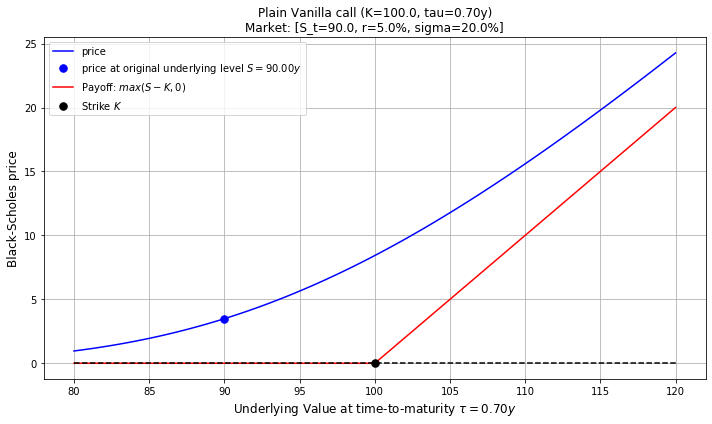

In [314]:
option_plotter.plot()

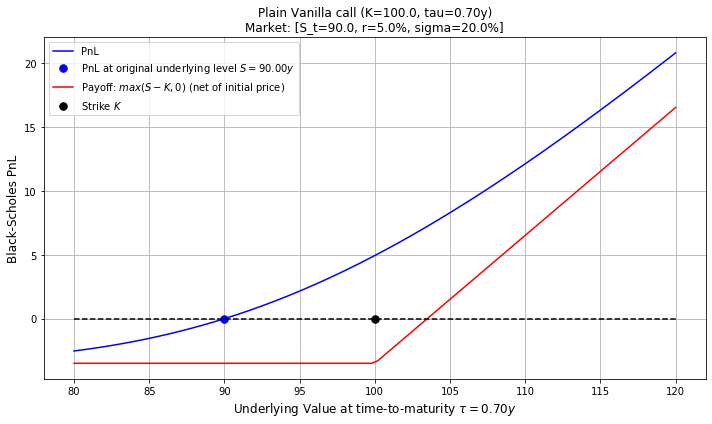

In [315]:
option_plotter.plot(method_name='PnL')

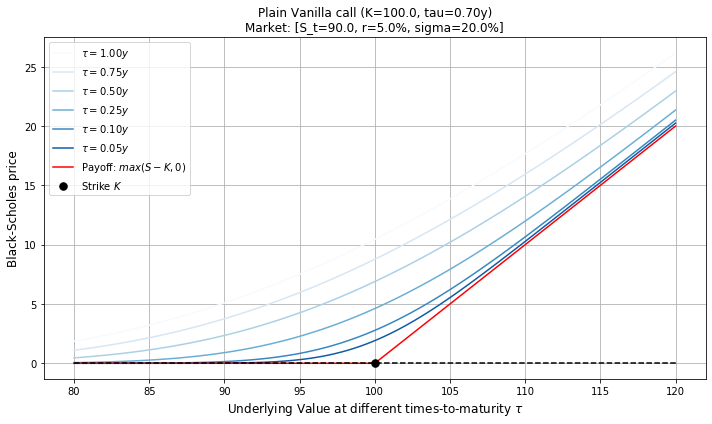

In [316]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

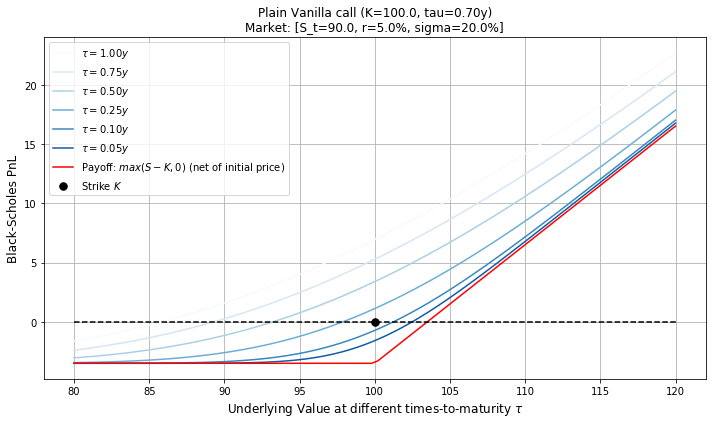

In [317]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0], method_name='PnL')

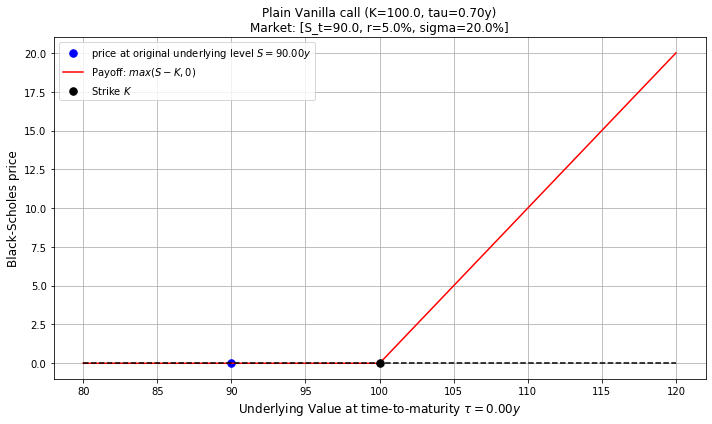

In [318]:
option_plotter.plot(tau=0.0)

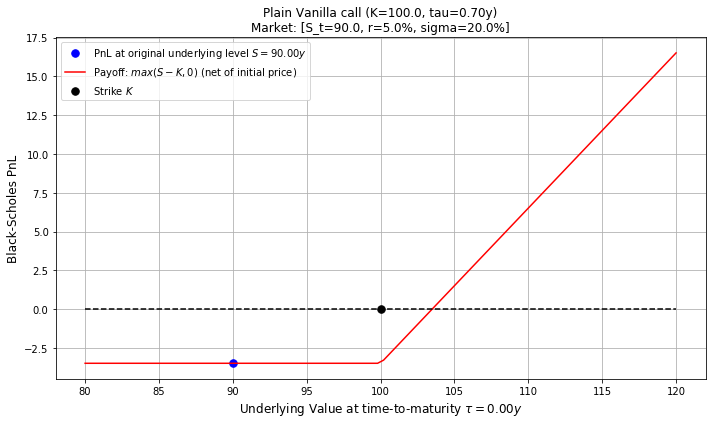

In [319]:
option_plotter.plot(tau=0.0, method_name='PnL')

In [320]:
CON_Call = DigitalOption(market_env)
CON_Call

Initializing the EuropeanOption!


DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [321]:
option_plotter = Plotter(CON_Call)

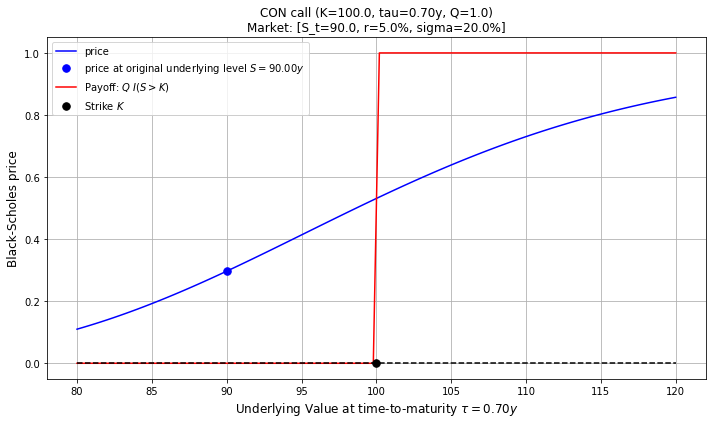

In [322]:
option_plotter.plot()

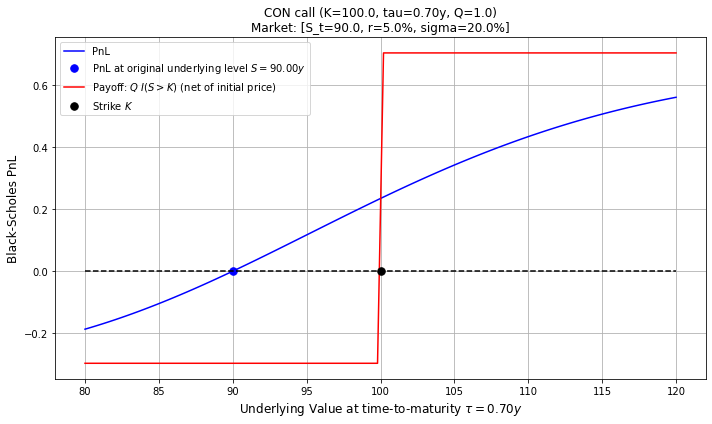

In [323]:
option_plotter.plot(method_name='PnL')

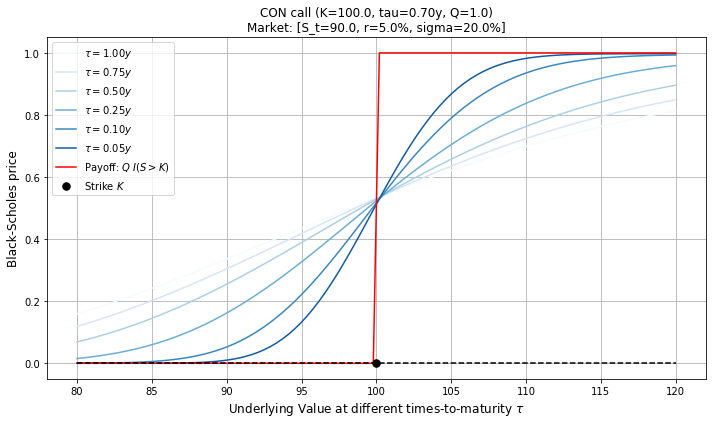

In [324]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.75, 1.0])

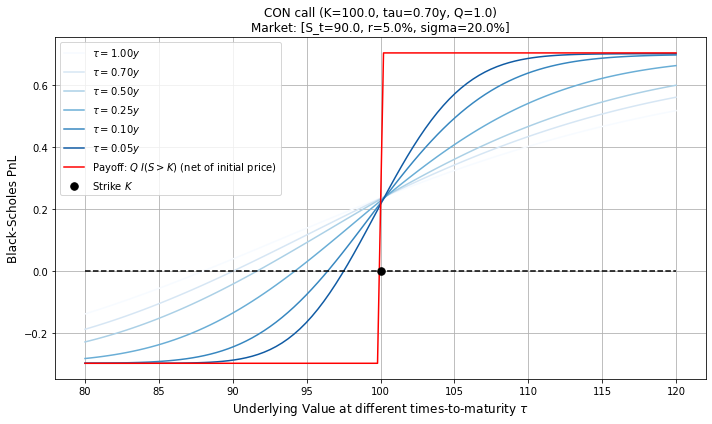

In [325]:
option_plotter.plot(tau=[0.05, 0.1, 0.25, 0.5, 0.7, 1.0], method_name='PnL')

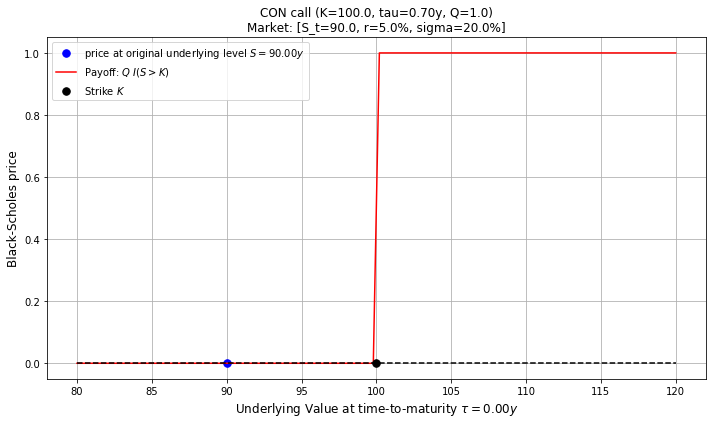

In [326]:
option_plotter.plot(tau=0.0)

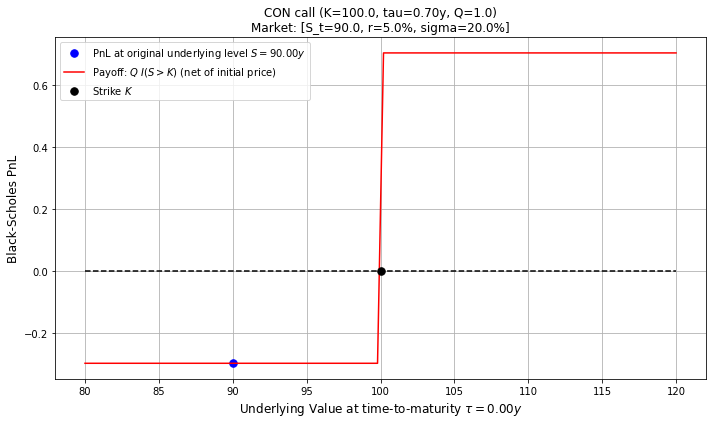

In [327]:
option_plotter.plot(tau=0.0, method_name='PnL')

# Composition application: a `Portfolio()` class

In [328]:
class Portfolio:
    
    def __init__(self):
        
        # initialize an empty portfolio
        self.__composition = []
        
        # initialize an empty info string
        self.__info = "Portfolio: \n"
        
    def __repr__(self):
        return self.get_info()
    
    # getters
    def get_info(self):
        return self.__info
    
    def get_composition(self):
        return self.__composition
        
    # composition method
    def add_instrument(self, FinancialInstrument, position):
        self.__composition.append({"instrument": FinancialInstrument,
                                   "position":   position})
        self.__update_info(FinancialInstrument, position)
    
    # private method to update the info
    def __update_info(self, fin_inst, pos):
        self.__info += "\t" + fin_inst.get_info() + " (position: {})".format(pos) + "\n"
        
    # portfolio value calculation - with optional *args and **kwargs parameters
    def price(self, *args, **kwargs):
        """
        Can be called as:
            - price(): uses .get_S() and .get_tau()
            - price(100.0): S == 100.0
            - price(100.0, 0.1): S == 100.0 and tau == 0.1
            - price(S=100.0, tau=0.1)
            - price([100.0, ..., 120.0], 0.1): S == [100.0, ..., 120.0] and tau == 0.1
            - price(S=[100.0, ..., 120.0], tau=0.1)
        """
                       
        ptf_value = 0
        
        if self.get_composition(): # if portfolio is empty returns 0
        
            for inst in self.get_composition():
                ptf_value += inst["position"] * inst["instrument"].price(*args, **kwargs)
        
        return ptf_value

In [329]:
Vanilla_Call

PlainVanillaOption('call', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [330]:
Vanilla_Put

PlainVanillaOption('put', S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [331]:
CON_Call

DigitalOption('call', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [332]:
CON_Put

DigitalOption('put', cash=1.0, S_t=90.0, K=100.0, t=19-04-2020, T=31-12-2020, tau=0.70y, r=5.0%, sigma=20.0%)

In [333]:
ptf = Portfolio()

In [334]:
ptf

Portfolio: 

In [335]:
ptf.add_instrument(Vanilla_Call, 1)

In [336]:
ptf

Portfolio: 
	Plain Vanilla call (K=100.0, tau=0.70y) (position: 1)

In [337]:
ptf.price()

3.487402470943657

In [338]:
Vanilla_Call.price()

3.487402470943657

In [339]:
ptf.add_instrument(Vanilla_Put, -5)

In [340]:
ptf

Portfolio: 
	Plain Vanilla call (K=100.0, tau=0.70y) (position: 1)
	Plain Vanilla put (K=100.0, tau=0.70y) (position: -5)

In [341]:
ptf.price()

-46.71925046638197

In [342]:
1 * Vanilla_Call.price() - 5 * Vanilla_Put.price() 

-46.71925046638197